# Prueba para científico de datos

## Parte 1 - Cargar datos y estadísticas básicas

En la carpeta ```Data``` encontrará un archivo llamado ```diamonds.csv```. Este archivo contiene información de 53940 diamantes. Dentro de la información disponible, está el precio, el color, el peso, etc. Puede consultar las características completas del dataset en [este enlace](https://www.kaggle.com/shivam2503/diamonds).

1. Cargue el archivo en un dataframe de pandas 
2. Use los metodos que conozca para describir las propiedades básicas de los datos. 

## Solución - Parte 1:
Inicialmente, es conveniente cargar las librerías que se van a utilizar.

### Nota general:
No debería tardar mucho en ejecutar si se tienen los archivos .pickle completos. Sin embargo, puede que ejecutar los pairplots tarde. Se pueden omitir las casillas que ejecutan pairplots :D

In [2]:
# Respuesta a la parte 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle

Dado que la columna "Unnamed: 0" no tiene información relevante, se puede descartar al crear el DataFrame

In [3]:
datos=pd.read_csv('Data/diamonds.csv').drop(['Unnamed: 0'],axis=1)
datos.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

En este caso, el archivo de datos está bien estructurado y no existen contratiempos a la hora de cargar los datos debido a algún error de formato. Sin embargo, es útil revisar si existen filas o columnas con datos nulos o Nan, para ello se pueden utilizar las dos siguientes funciones. 

In [4]:
print("Información de DataFrame:"+"\n"+"#"*40)
print(datos.info())
print("\n"*2)
print("Cantidad de valores nulos"+"\n"+"#"*40)
print(datos.isnull().sum())

Información de DataFrame:
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None



Cantidad de valores nulos
########################################
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


#### Estadísticas generales de los datos

A continuación se presentan estadísticas generales de los datos como la media, desviación estándar, el valor mínimo y máximo de cada dato. Estos valores dan una información descriptiva muy general de los datos y permiten empezar a definir qué tipo de estrategias es pertinente realizar en los datos. 

Según la descripción del Dataset (https://www.kaggle.com/shivam2503/diamonds), cada característica describe lo siguiente:

**price** Precio en dólares $[\$326,\$18.823]$

**carat** Peso del diamante $carat=[0.2,5.01]$

**cut** Calidad del corte $cut=\{Fair, Good, Very Good, Premium, Ideal\}$

**color** Color del diamante, de J (peor) to D (mejor)

**clarity** Una medida de qué tan claro es el diamante $clarity=(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)$

**x** longitud en mm $longitud=[0,10.74]$

**y** ancho en mm $[0,58.9]$

**z** profundidad en mm $[0,31.8]$

**depth** porcentaje total de profundidad $[43,79]$

**table** Ancho relativo de la punta del diamante en relación a su punto más ancho $[43,95]$

In [5]:
datos.describe().loc[['mean','std','min','max']]
#datos.describe()

carat      depth      table         price          x          y  \
mean  0.797940  61.749405  57.457184   3932.799722   5.731157   5.734526   
std   0.474011   1.432621   2.234491   3989.439738   1.121761   1.142135   
min   0.200000  43.000000  43.000000    326.000000   0.000000   0.000000   
max   5.010000  79.000000  95.000000  18823.000000  10.740000  58.900000   

              z  
mean   3.538734  
std    0.705699  
min    0.000000  
max   31.800000

## Histogramas de los datos
Si bien la función describe es útil para analizar estadísticas en los valores numéricos, no da información de las variables categóricas, por lo que es útil realizar histogramas de estas. 

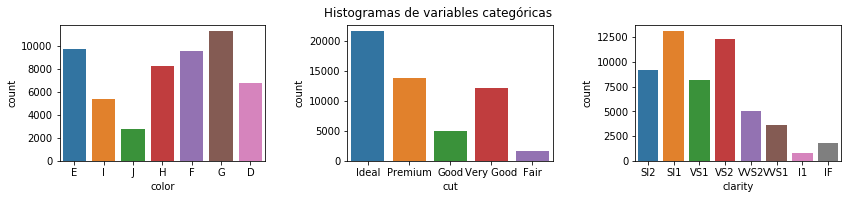

In [6]:
f,ax=plt.subplots(1,3,figsize=(14,2.5))
f.suptitle('Histogramas de variables categóricas')
plt.subplots_adjust(wspace = 0.4)
sns.countplot(x='color',data=datos,ax=ax[0])
sns.countplot(x='cut',data=datos,ax=ax[1])
sns.countplot(x='clarity',data=datos,ax=ax[2])
plt.show()

Otra forma sencilla de observar los datos a grandes rasgos es realizando pairplots. Esto consiste en graficar todas las características de los datos entre sí, graficando en la diagonal el histograma de cada característica. Dependiendo del tipo de análisis que posteriormente se vaya a realizar, puede ser útil escoger como discriminador de color ('hue') variables categóricas.

### Discriminado por calidad

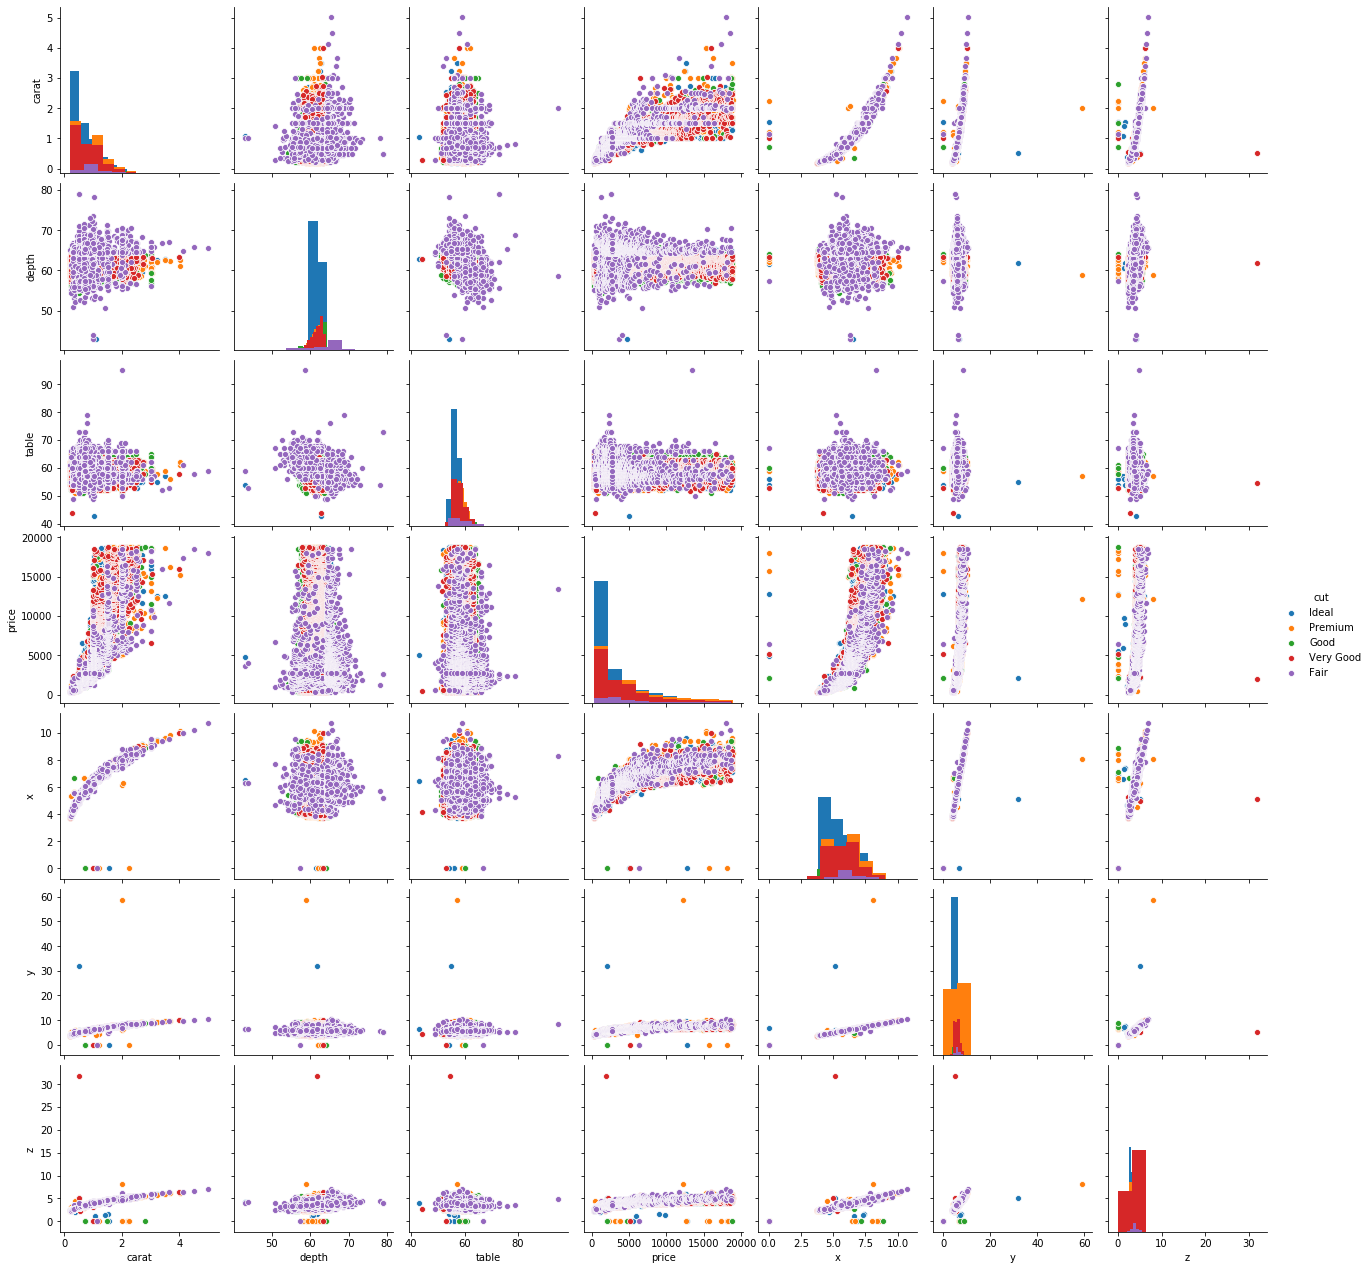

In [7]:
sns.pairplot(datos,diag_kind='hist',hue='cut')
plt.show()

### Discriminado por claridad

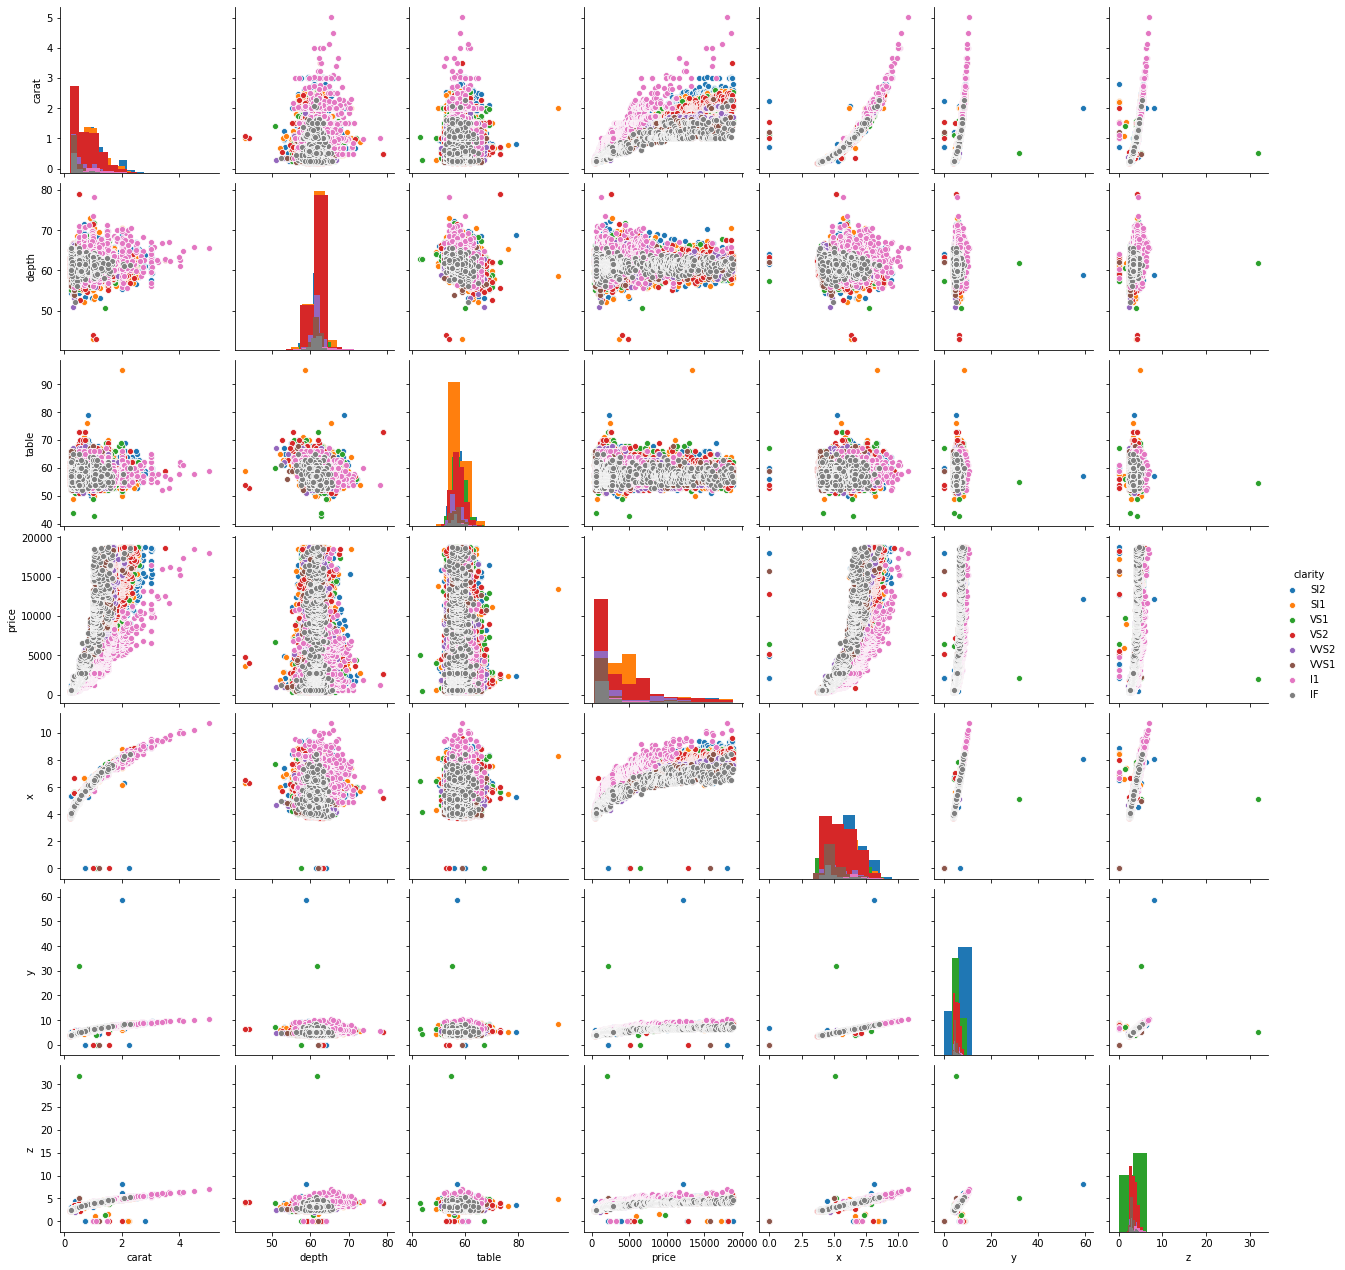

In [8]:
sns.pairplot(datos,diag_kind='hist',hue='clarity')
plt.show()

### Discriminado por color

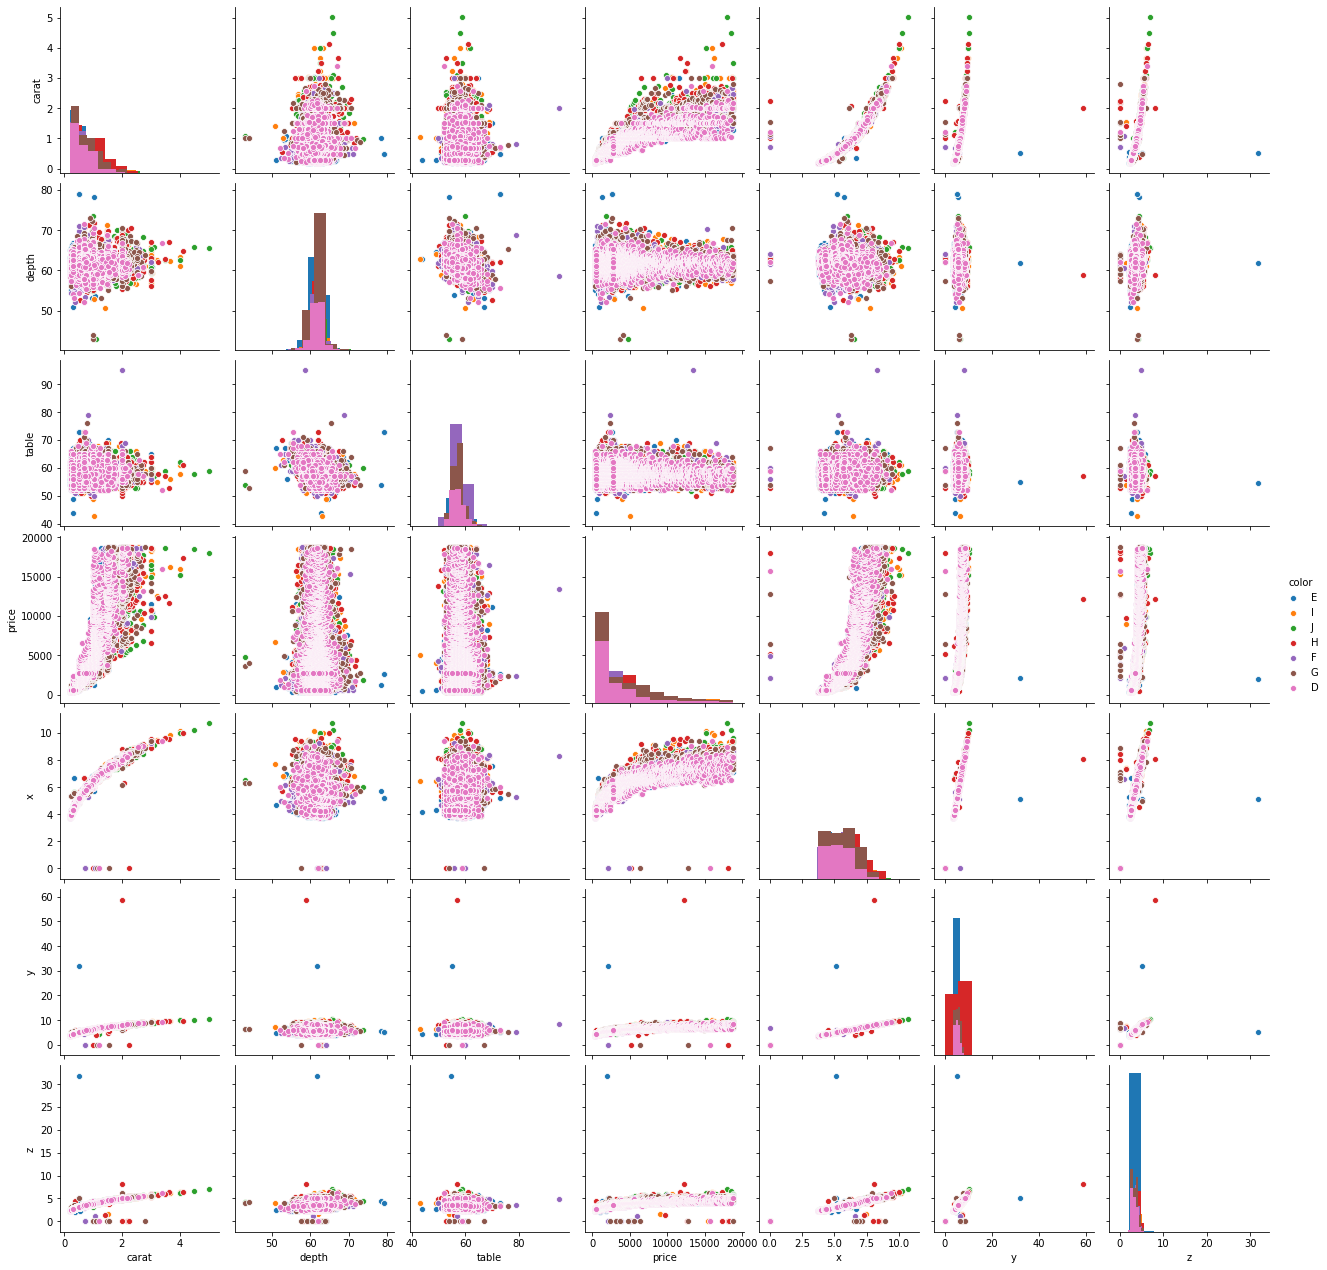

In [9]:
sns.pairplot(datos,diag_kind='hist',hue='color')
plt.show()

Nota: En este caso es viable realizar este tipo de análisis porque la cantidad de datos y de características no es demasiado grande. Si se tuviese una mayor cantidad de datos o características, este tipo de análisis visuales no serían factibles o útiles. 

### Outliers

Se puede verificar si existen o no outliers en los datos verificando el score Z para las variables estandarizadas. En caso de existir, se almacenan en outliers. En este caso, no existen outliers bajo este criterio. 

In [10]:
datos_=datos._get_numeric_data().columns

In [11]:
outliers=datos[(np.abs(stats.zscore(datos[datos_])) >= 3).all(axis=1)]
print(outliers)

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


No obstante, teniendo en cuenta la información de la descripción inicial, es posible ver que algunos valores en 'x', 'y', 'z' son cero, lo cual en principio no tendría sentido, debido a que un diamante no puede tener una medida de 0 en x, y o z. 

In [12]:
datos.loc[(datos['x']==0) | (datos['y']==0) | (datos['z']==0)]

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

Dependiendo de la cantidad de datos que se tenga disponible (y el tipo de análisis que se quiera realizar) es posible realizar diferentes tipos de operaciones con estos datos, es posible asignarles el valor de la media de los demás datos o simplemente no utilizarlos. En esta ocasión, descartaré estos datos.

In [13]:
datos=datos.loc[(datos['x']>0) | (datos['y']>0) | (datos['z']>0)]
datos

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53933 rows x 10 columns]

### Correlaciones entre datos:

En algunas ocasiones, es posible encontrar datos valiosos a partir de los pairplots, histogramas y scatters. Por ejemplo, hayar correlaciones según la forma de las distribuciones o hayar espacios en los que los datos tengan una mayor separabilidad. Esto es útil como un punto de partida, pero no es suficiente. Por esta razón, es importante cuantificar las relaciones entre los datos. 

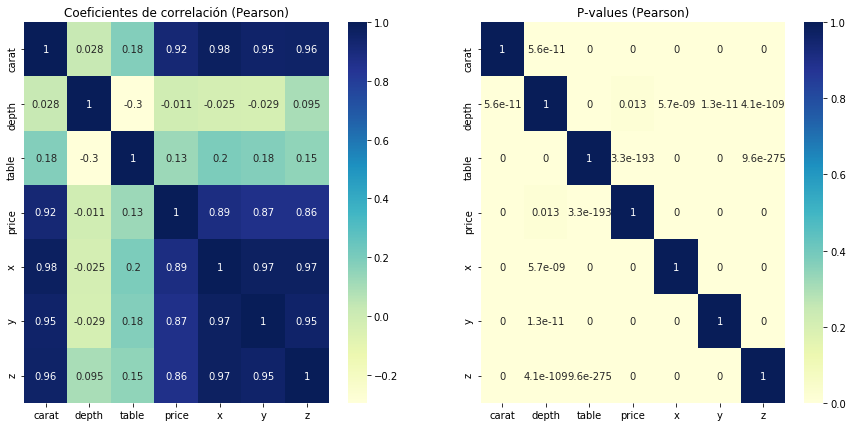

In [14]:
def pearR(a,b):
    return stats.pearsonr(a,b)[0]
def pvalR(a,b):
    return stats.pearsonr(a,b)[1]

fig,ax=plt.subplots(1,2,figsize=(15,7))

sns.heatmap(data=datos.corr(method=pearR), annot=True, cbar=True,ax=ax[0],cmap="YlGnBu")
sns.heatmap(data=datos.corr(method=pvalR), annot=True, cbar=True,ax=ax[1],cmap="YlGnBu")
ax[0].set_title("Coeficientes de correlación (Pearson)")
ax[1].set_title("P-values (Pearson)")
plt.show()

El coeficiente de correlación de Pearson evalúa la relación lineal entre dos variables. En la gráfica de la izquierda se encuentran los valores de dichos coeficientes y en la gráfica de la derecha el p-value asociado. Dado que la gráfica de la derecha muestra p-values muy bajos, es posible decir que los coeficientes encontrados en la izquierda son significativos (suponiendo una prueba p-value 0.01, por ejemplo). 

Teniendo en cuenta esto, es posible decir entonces que:
- El precio está correlacionado con el tamaño (x,y,z) y con el peso del diamante (carat)
- El precio presenta una muy ligera anticorrelación con la profundidad (depth)
- El precio presenta una ligera correlación con el valor de table. 
- El tamaño (x,y,z) está altamente correlacionado con el peso. 
- table está anticorrelacionado con depth.

También es interesante observar si estas correlaciones cambian si discriminamos las variables categóricas, por ejemplo, el valor de 'cut':

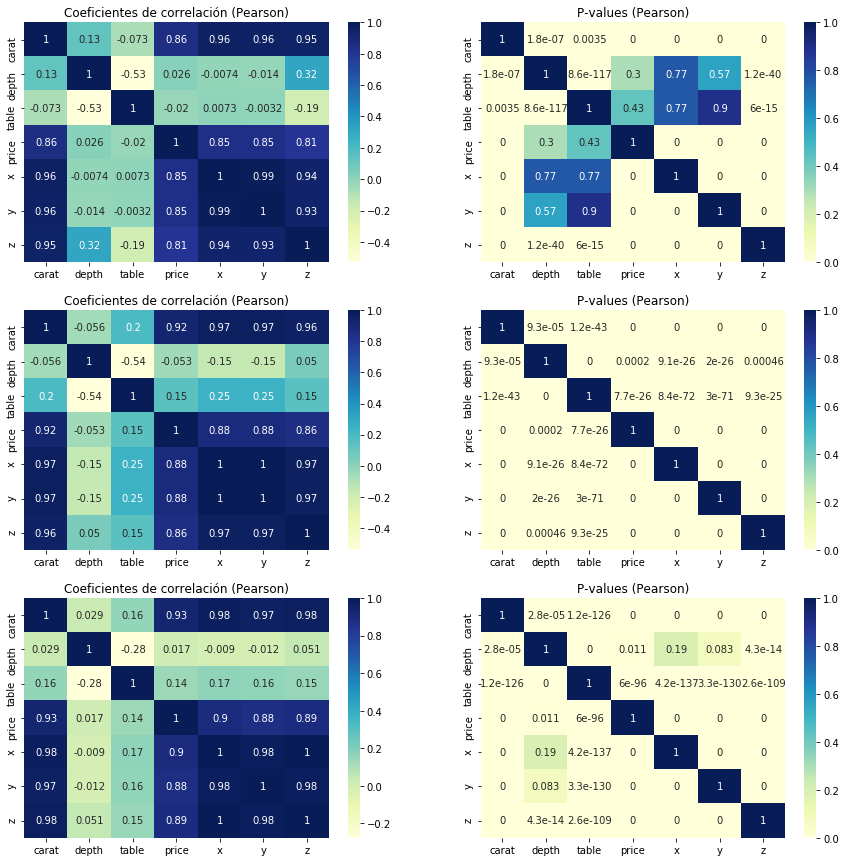

In [15]:
fig,ax=plt.subplots(3,2,figsize=(15,15))

sns.heatmap(data=datos[datos['cut']=='Fair'].corr(method=pearR), annot=True, cbar=True,ax=ax[0][0],cmap="YlGnBu")
sns.heatmap(data=datos[datos['cut']=='Fair'].corr(method=pvalR), annot=True, cbar=True,ax=ax[0][1],cmap="YlGnBu")
ax[0][0].set_title("Coeficientes de correlación (Pearson)")
ax[0][1].set_title("P-values (Pearson)")

sns.heatmap(data=datos[datos['cut']=='Good'].corr(method=pearR), annot=True, cbar=True,ax=ax[1][0],cmap="YlGnBu")
sns.heatmap(data=datos[datos['cut']=='Good'].corr(method=pvalR), annot=True, cbar=True,ax=ax[1][1],cmap="YlGnBu")
ax[1][0].set_title("Coeficientes de correlación (Pearson)")
ax[1][1].set_title("P-values (Pearson)")

sns.heatmap(data=datos[datos['cut']=='Ideal'].corr(method=pearR), annot=True, cbar=True,ax=ax[2][0],cmap="YlGnBu")
sns.heatmap(data=datos[datos['cut']=='Ideal'].corr(method=pvalR), annot=True, cbar=True,ax=ax[2][1],cmap="YlGnBu")
ax[2][0].set_title("Coeficientes de correlación (Pearson)")
ax[2][1].set_title("P-values (Pearson)")

plt.show()

Como se pudo ver previamente, algunas de las correlaciones que inicialmente se encontraban realizando el análisis utilizando todos los datos, al discriminar según 'cut', cambian o como se puede ver en el caso de 'cut'='Fair', dejan de tener un p-value lo suficientemente pequeño. No obstante realizar este trabajo sobre todos los posibles valores de todas las variables categóricas de manera exhaustiva puede ser innecesario. Pero es importante tener en cuenta que las conclusiones estadísticas generales de los datos no necesariamente implican conclusiones sobre conjuntos particulares de los datos. 

# Escala de los datos:
Es importante notar que los datos no están en la misma escala. Es importante tener en cuenta esto de manera previa a realizar algún tipo de aprendizaje con los datos, ya que es importante normalizar. 

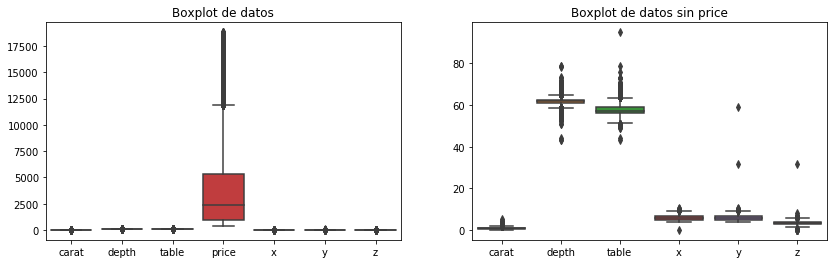

In [16]:
fig,ax=plt.subplots(1,2,figsize=(14,4))
sns.boxplot(data=datos[datos_],ax=ax[0])
ax[0].set_title('Boxplot de datos')
sns.boxplot(data=datos[datos_[datos_!='price']],ax=ax[1] )
ax[1].set_title('Boxplot de datos sin price')
plt.show()

Claramente price está se encuentra en una escala muy diferente a los demás datos. Por lo que normalizar va a ser importante y será importante tener en cuenta qué tipo de normalización se va a realizar y por qué. A continuación se muestran dos formas de normalización típicas.

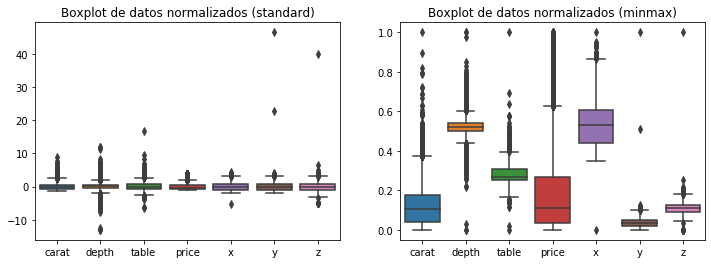

In [17]:
from sklearn import preprocessing

x = datos[datos_] 
scaler = preprocessing.StandardScaler()
scaler2 = preprocessing.MinMaxScaler()

x_ = scaler.fit_transform(x)
x_2 = scaler2.fit_transform(x)

datosN = pd.DataFrame(x_,columns=list(datos_))
datosN2 = pd.DataFrame(x_2,columns=list(datos_))

f,ax=plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=datosN[datos_],ax=ax[0])
sns.boxplot(data=datosN2[datos_],ax=ax[1])
ax[0].set_title('Boxplot de datos normalizados (standard)')
ax[1].set_title('Boxplot de datos normalizados (minmax)')
plt.show()

### Para finalizar...
Ya se conoce qué variables tienen una mayor correlación con el precio. Para finalizar observemos cómo ser comporta el precio según cada una de las variables categóricas. 

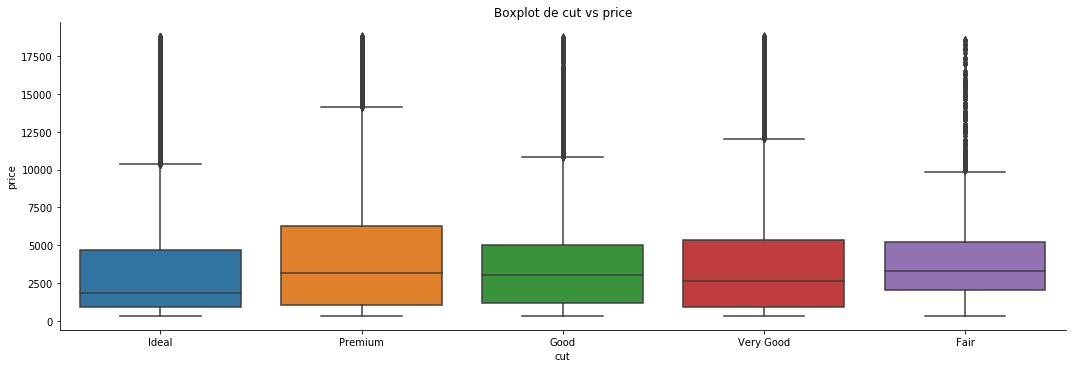

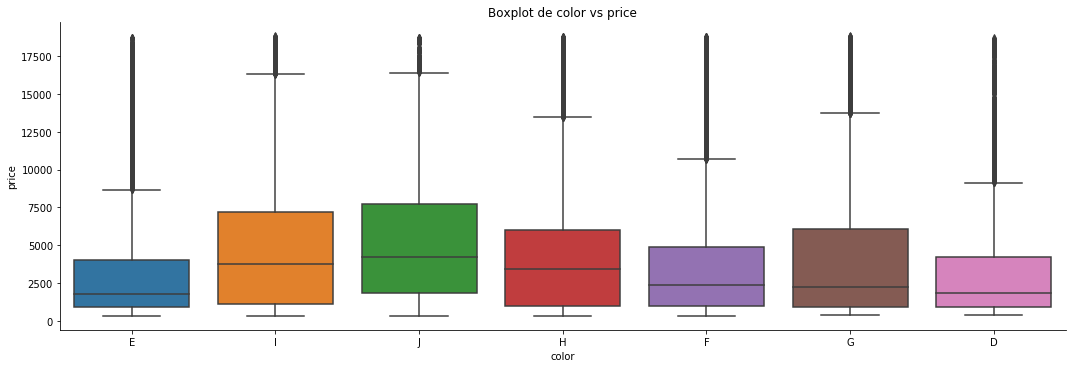

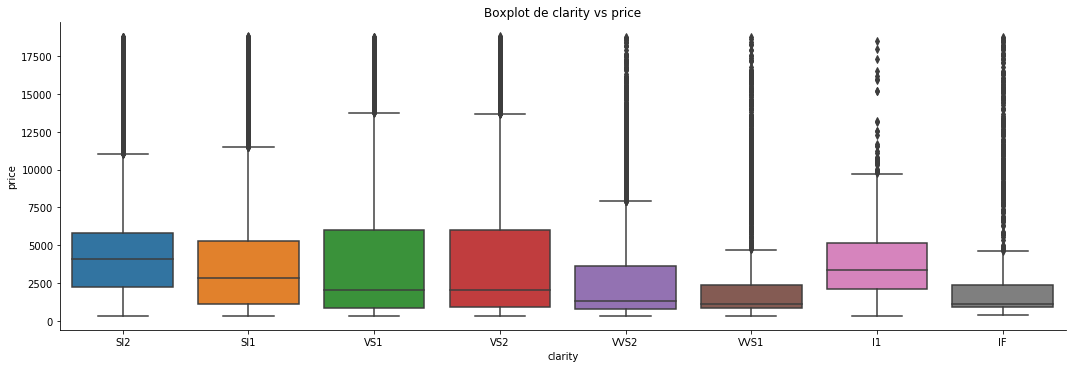

In [18]:
sns.catplot(x='cut', y='price', data=datos, kind='box', aspect=3)
plt.title('Boxplot de cut vs price')
sns.catplot(x='color', y='price', data=datos, kind='box', aspect=3)
plt.title('Boxplot de color vs price')
sns.catplot(x='clarity', y='price', data=datos, kind='box', aspect=3)
plt.title('Boxplot de clarity vs price')
plt.show()

## Parte 2 - Aprendizaje no supervisado

Usted desea encontrar estructura en los datos que le han sido dados. 
1. A partir del dataframe que cargó en el primer punto, use algún algoritmo de aprendizaje no supervisado para encontrar clusters de diamantes con propiedades similares. 
2. En una celda de markdown, describa una métrica/método que se pueda utilizar para evaluar la calidad de sus clusters.
3. Varie $k$ (la cantidad de clusters) de 1 a 10 y grafique su métrica en función de $k$
4. Qué $k$ describe mejor sus datos? 

## Solución - Parte 2
Lo primero es realizar una transformación de los datos 



In [19]:
cat_data=list(set(datos.columns).difference(set(datos_)))

le = preprocessing.LabelEncoder()

for i in range(3):
    datos[cat_data[i]] = le.fit_transform(datos[cat_data[i]])

datos

carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64

[53933 rows x 10 columns]

In [20]:
from sklearn.cluster import SpectralClustering, SpectralClustering, AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score

Para estos propósitos, utilizaré un StandardScaler

In [21]:
scaler = StandardScaler() 
datos_scaled = scaler.fit_transform(datos) 
datos_scaled = pd.DataFrame(datos_scaled,columns=datos.columns)
datos_scaled

carat       cut     color   clarity     depth     table     price  \
0     -1.198123 -0.538201 -0.937139 -0.484224 -0.174056 -1.099806 -0.904101   
1     -1.240319  0.434905 -0.937139 -1.064057 -1.360803  1.585921 -0.904101   
2     -1.198123 -1.511307 -0.937139  0.095608 -3.385253  3.376406 -0.903850   
3     -1.071535  0.434905  1.414232  0.675441  0.454221  0.243057 -0.902095   
4     -1.029339 -1.511307  2.002074 -0.484224  1.082499  0.243057 -0.901845   
...         ...       ...       ...       ...       ...       ...       ...   
53928 -0.164321 -0.538201 -1.524981 -1.064057 -0.662717 -0.204564 -0.294624   
53929 -0.164321 -1.511307 -1.524981 -1.064057  0.942882 -1.099806 -0.294624   
53930 -0.206517  1.408011 -1.524981 -1.064057  0.733456  1.138300 -0.294624   
53931  0.131051  0.434905  0.826389 -0.484224 -0.523099  0.243057 -0.294624   
53932 -0.101027 -0.538201 -1.524981 -0.484224  0.314604 -1.099806 -0.294624   

              x         y         z  
0     -1.591095 -1.539268 -1.574249  
1     -1.644670 -1.662039 -1.744562  
2     -1.501803 -1.460343 -1.744562  
3     -1.367865 -1.320033 -1.290394  
4     -1.242856 -1.214800 -1.120081  
...         ...       ...       ...  
53928  0.016161  0.021687 -0.055626  
53929 -0.037414  0.012917  0.100494  
53930 -0.064202 -0.048469  0.029531  
53931  0.373329  0.337385  0.285000  
53932  0.087595  0.118150  0.143073  

[53933 rows x 10 columns]

In [22]:
try:
    modelos=pickle.load( open( "modelos.pickle", "rb" ) )
except:
    modelos={"K-means":{i:KMeans(n_clusters=i, random_state=1) for i in range(1,15)},"Spectral":{i:SpectralClustering(n_clusters=i) for i in range(2,6)},"Agglomerative":{i:AgglomerativeClustering(n_clusters=i) for i in range(2,6)}}

    for _type in ["K-means"]:
        for i in range(2,15):
            modelos[_type][i]=modelos[_type][i].fit(datos_scaled)
            print("Training "+_type+" %d"%i)

    ## K-means:
    with open('modelos.pickle', 'wb') as f:
        pickle.dump(modelos, f)


### Evaluación

Dado que para este caso de estudio, no existe un conocimiento de los datos que de información sobre cómo agrupar (algún tipo de ground truth), algunas métricas de evaluación de clusters no se pueden aplicar, como los criterios basados en información mutua o fowles mallows. Por lo tanto, consideré útil utilizar los criterios Calinski-Harabasz (CH), Davies-Bouldin (DB) y Silhouette (S). 

**DB Score:** Este índice es bajo cuando se tienen modelos con buena separación entre clusters. El valor más bajo posible es cero. 

La definición está dada por: 

Para cada clúster $C_i$ y otro clúster $C_j$, con con $i,j=1,...n$, se define:
$$
R_{i,j}=\frac{s_i+s_j}{d_{ij}}
$$
con $s_i$ como la distancia promedio entre cada punto del clúster $i$ y el centroide del clúster y $d_{ij}$ como la distancia entre los centroides de los clústers $i$ y $j$

Por lo que el score es:

$$
DB=\frac{1}{k}\sum_{i=1}^{k}{\max_{i\neq j}{R_{ij}}}
$$


**Calinski-Harabasz Score:** Este índice es el radio de la suma de la dispersión entre clusteres y la dispersión interna de cada clúster así:
$$
s=\frac{tr(B_k)}{tr(W_k)}\times \frac{n_E-k}{k-1}
$$
donde tr(B_k) es la traza de la matriz de dispersión entre diferentes clústeres y tr(W_k) la traza de la matriz de dispersión de cada clúster. 

$$
W_k=\sum_{q=1}^{k}{\sum_{x\in C_q}{(x-c_q)(x-c_q)^T}}
$$

$$
B_k=\sum_{q=1}^{k}{n_q(c_q-c_E)(c_q-c_E)^T}
$$
con $C_q$ siendo el conjunto de puntos en el clúster $q$, $c_q$ el centro del clúster, $c_E$ el centro de $E$, y $n_q$
el número de puntos en el clúster $q$

Este score es más alto cuando los clústers están más separados. 

**Silhouette Coefficient:**
El coeficiente Silhouette está definido por cada muestra y se compone de los scores $a$ y $b$, donde $a$ es la distancia promedio entre una muestra y los demás puntos de la clase y $b$ es la distancia promedio entre la muestra y los demás puntos en el siguiente clúster más cercano, así:

$$
s=\frac{b-a}{max(a,b)}
$$

El valor de $s$ está entre -1 y 1, donde -1 es un clustering incorrecto y 1 un clústering correcto. 

In [23]:


try:
    scores=pickle.load( open( "scores.pickle", "rb" ) )
except:
    
    scores={"K-means":[]}
    scoresTypes={calinski_harabasz_score,davies_bouldin_score,silhouette_score}

    for _type in ["K-means"]:
        scores["K-means"]={}

        scores["K-means"]["CH Score"]=[calinski_harabasz_score(datos_scaled,modelos["K-means"][i].labels_) for i in range(2,15)]    
        scores["K-means"]["DB Scores"]=[davies_bouldin_score(datos_scaled,modelos["K-means"][i].labels_) for i in range(2,15)]
        scores["K-means"]["Silhouete Score"]=[silhouette_score(datos_scaled,modelos["K-means"][i].labels_) for i in range(2,15)]
    
    with open('scores.pickle', 'wb') as f:
        pickle.dump(scores, f)
        
        



In [24]:
print(scores)

{'K-means': {'CH Score': [28913.182198702154, 20666.87124875159, 16527.821695174305, 14444.469476516784, 13174.498839229256, 12245.33602865377, 11444.6412772109, 10741.646751900982, 10113.005995701787, 9583.88805007039, 9212.863572562874, 8827.440722354528, 8540.097846659988], 'DB Scores': [1.2787453980940353, 1.514949821007902, 1.7409308726694157, 1.8178045172014978, 1.7138336193696124, 1.630113749796458, 1.6516726776235129, 1.6010024281121373, 1.571038546356249, 1.5884691499748584, 1.5973495282504178, 1.6752274847691546, 1.6513027507194387], 'Silhouete Score': [0.3133945918570481, 0.2383980037015258, 0.18141923624320855, 0.1741480102693343, 0.18536310651452634, 0.1807344621447387, 0.16781136372102404, 0.167034378554201, 0.1549375316644875, 0.15596720790661386, 0.15576610560976778, 0.15468391986455143, 0.15779453710519867]}}


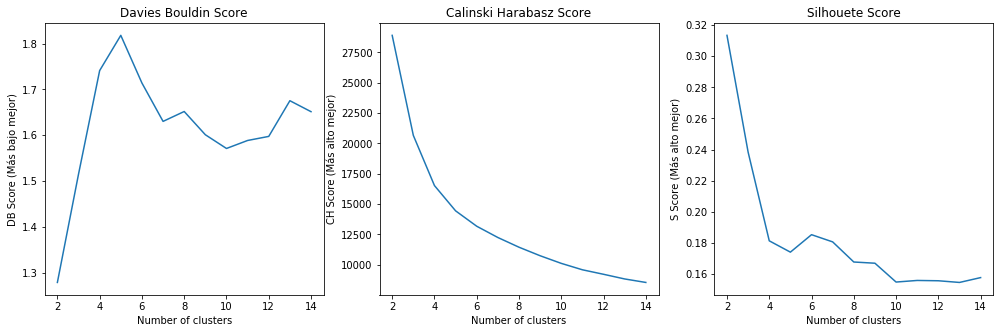

In [25]:
f,ax=plt.subplots(1,3,figsize=(17,5))

ax[0].plot(np.arange(2,15),scores["K-means"]["DB Scores"])
ax[0].set_title('Davies Bouldin Score')
ax[1].plot(np.arange(2,15),scores["K-means"]["CH Score"])
ax[1].set_title('Calinski Harabasz Score')
ax[2].plot(np.arange(2,15),scores["K-means"]["Silhouete Score"])
ax[2].set_title('Silhouete Score')
[ax[i].set_xlabel('Number of clusters') for i in range(3)]
ax[0].set_ylabel('DB Score (Más bajo mejor)')
ax[1].set_ylabel('CH Score (Más alto mejor)')
ax[2].set_ylabel('S Score (Más alto mejor)')
plt.show()

A partir de esta información, las únicas conclusiones posibles son:

- La cantidad óptima de clústers es 2 y está de acuerdo con todos los criterios seleccionados. 
- Según el criterio Davies Bouldin, si se escogen 10 clústers se tiene el segundo mejor score, lo que significa que al escoger 10 clústers, se tiene una buena separación de clústers (En caso que un dos clústers no sea lo deseado por algún tipo de conocimiento externo del problema). 
- Según el criterio de Silueta, al escoger 6 clústeres se tiene una mejor agrupación que en los demás casos excepto en 2 clústeres. En este caso, si se escogen 10 clústeres, la agrupación no es tan compacta. 


## Método de Mezclas Gaussianas 

El método de mezclas gaussianas es una generalización del método de K-means debido a que incorpora formas de agrupamiento que no necesariamente asumen una covarianza nula de la distribución espacial del clúster, lo que permite distribuciones con geometrías elípticas. Adicionalmente, se puede forzar este método para que la covarianza de las distribuciones sea nula, lo que básicamente resulta en el método de K-means. 

In [26]:
from sklearn.mixture import GaussianMixture

types=['spherical', 'diag', 'tied', 'full']



try:
    models=pickle.load( open( "models.pickle", "rb" ) )
except:
    models = [[GaussianMixture(n_components=i, covariance_type=type_, init_params='kmeans').fit(datos_scaled) for type_ in types] for i in range(1,15)]        
    
    with open('models.pickle', 'wb') as f:
        pickle.dump(models, f)
    
    


## Criterios AIC y BIC

Otra forma de evaluar el agrupamiento es a través de los criterios de información Bayesiano (BIC) y de Aikake (AIC), los cuales dan referencia de qué tan bueno es el modelo añadiendo una penalización a su complejidad. A continuación se muestran los criterios AIC, BIC y el Score dado por el Log-likelihood para diferentes tipos de covarianzas. 

In [27]:
scores2=np.array([[[model_.bic(datos_scaled),model_.aic(datos_scaled),model_.score(datos_scaled)] for model_ in model] for model in models])

In [28]:
bic=pd.DataFrame(scores2[:,:,0],columns=types,index=np.arange(1,15))
aic=pd.DataFrame(scores2[:,:,1],columns=types,index=np.arange(1,15))
scr=pd.DataFrame(scores2[:,:,2],columns=types,index=np.arange(1,15))

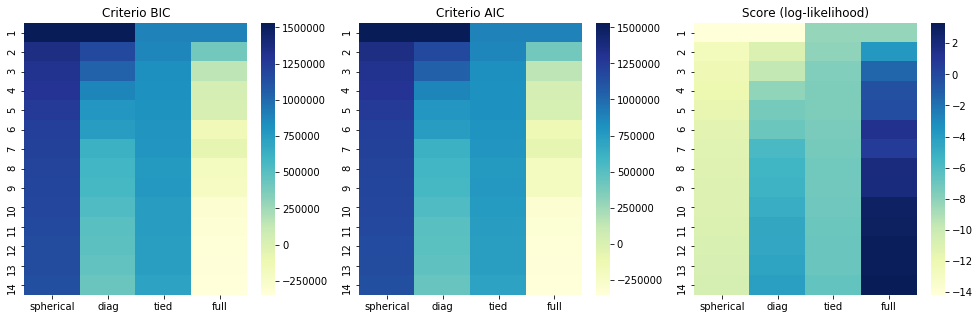

In [29]:
f,ax=plt.subplots(1,3,figsize=(17,5))
sns.heatmap(data=bic,ax=ax[0],cmap="YlGnBu")
sns.heatmap(data=aic,ax=ax[1],cmap="YlGnBu")
sns.heatmap(data=scr,ax=ax[2],cmap="YlGnBu")
ax[0].set_title('Criterio BIC')
ax[1].set_title('Criterio AIC')
ax[2].set_title('Score (log-likelihood)')
plt.show()

De acuerdo a estos criterios, la mejor opción (entre las evaluadas) es escoger 13 clústeres debido a que tienen los mejores valores en los criterios AIC y BIC en comparación a las demás alternativas y el mejor Score (log-likelihood). Sin embargo, es importante mencionar en este punto que la evaluación de los algoritmos de agrupamiento no debe ser algo estático y no debe depender únicamente de los criterios estadísticos, en la medida de lo posible, la interpretación del problema es útil para definir qué criterio es preferible utilizar (separación entre clústeres, menos cantidad de errores, etc)

# Visualización

In [30]:
datos_=datos._get_numeric_data().columns
datosCopia=datos[datos_]
datosCopia["label"]=modelos["K-means"][2].labels_

#### Clústering 2: K-means: 2 clústeres

[]

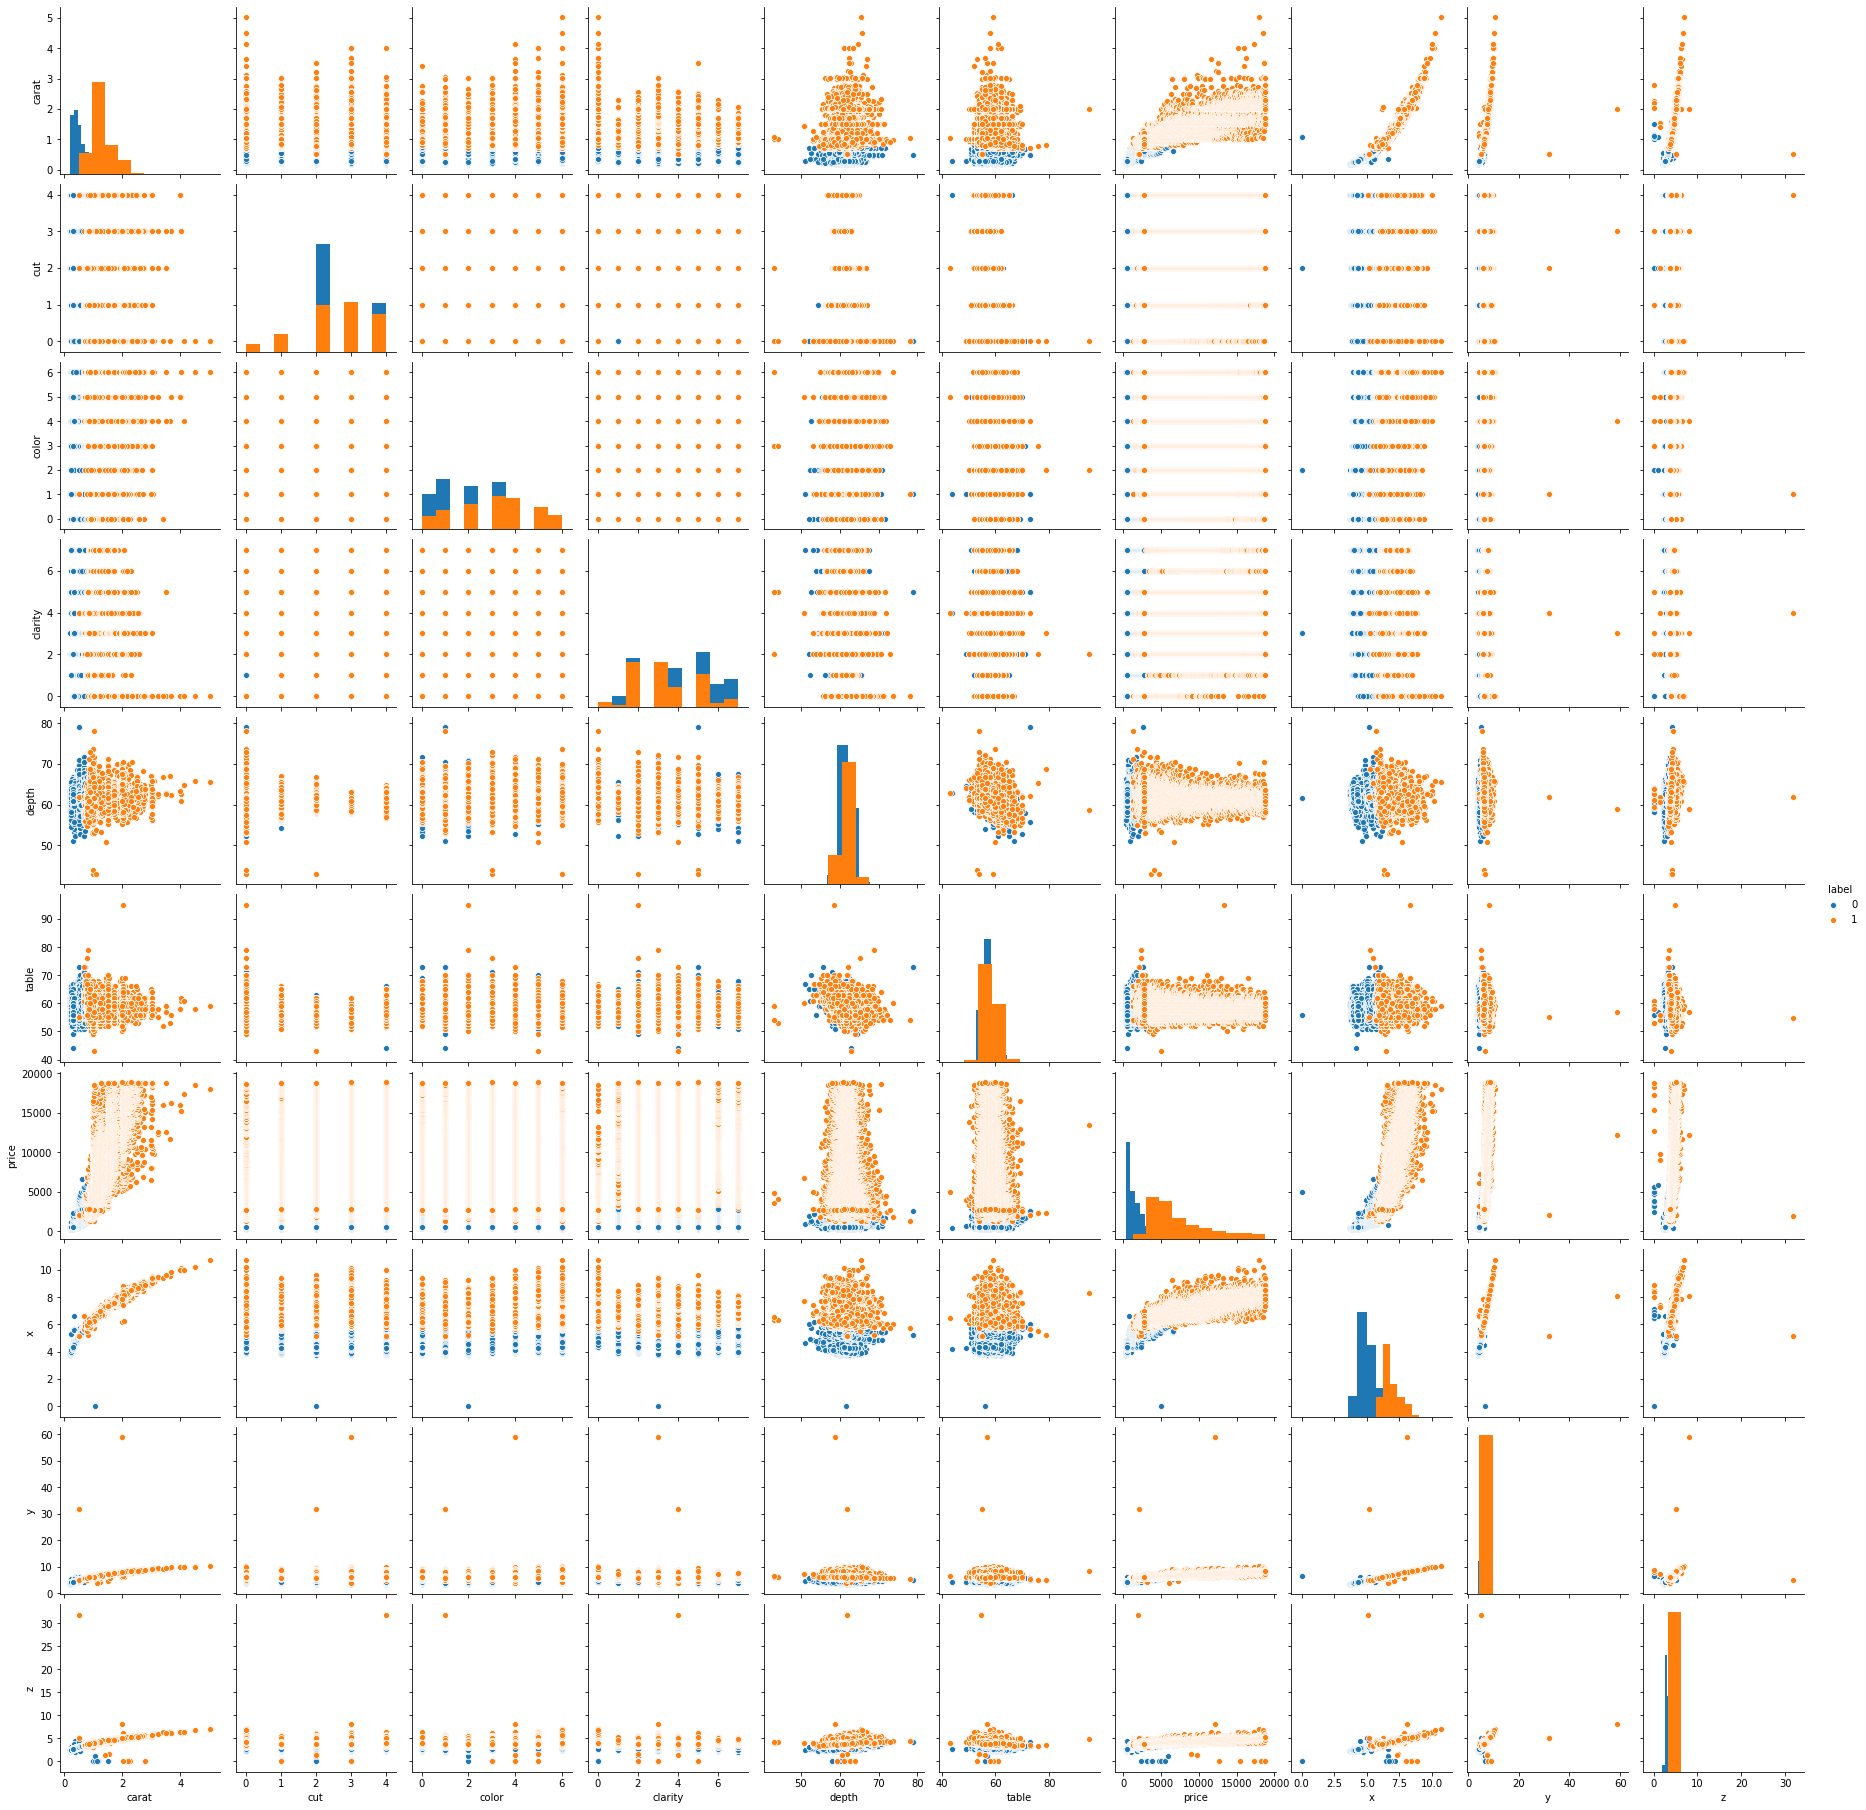

In [31]:
sns.pairplot(datosCopia,hue='label',diag_kind='hist')
plt.plot()

In [32]:
datos_=datos._get_numeric_data().columns
datosCopia=datos[datos_]
datosCopia["label"]=modelos["K-means"][6].labels_

#### Clústering 2: K-means: 6 clústeres

[]

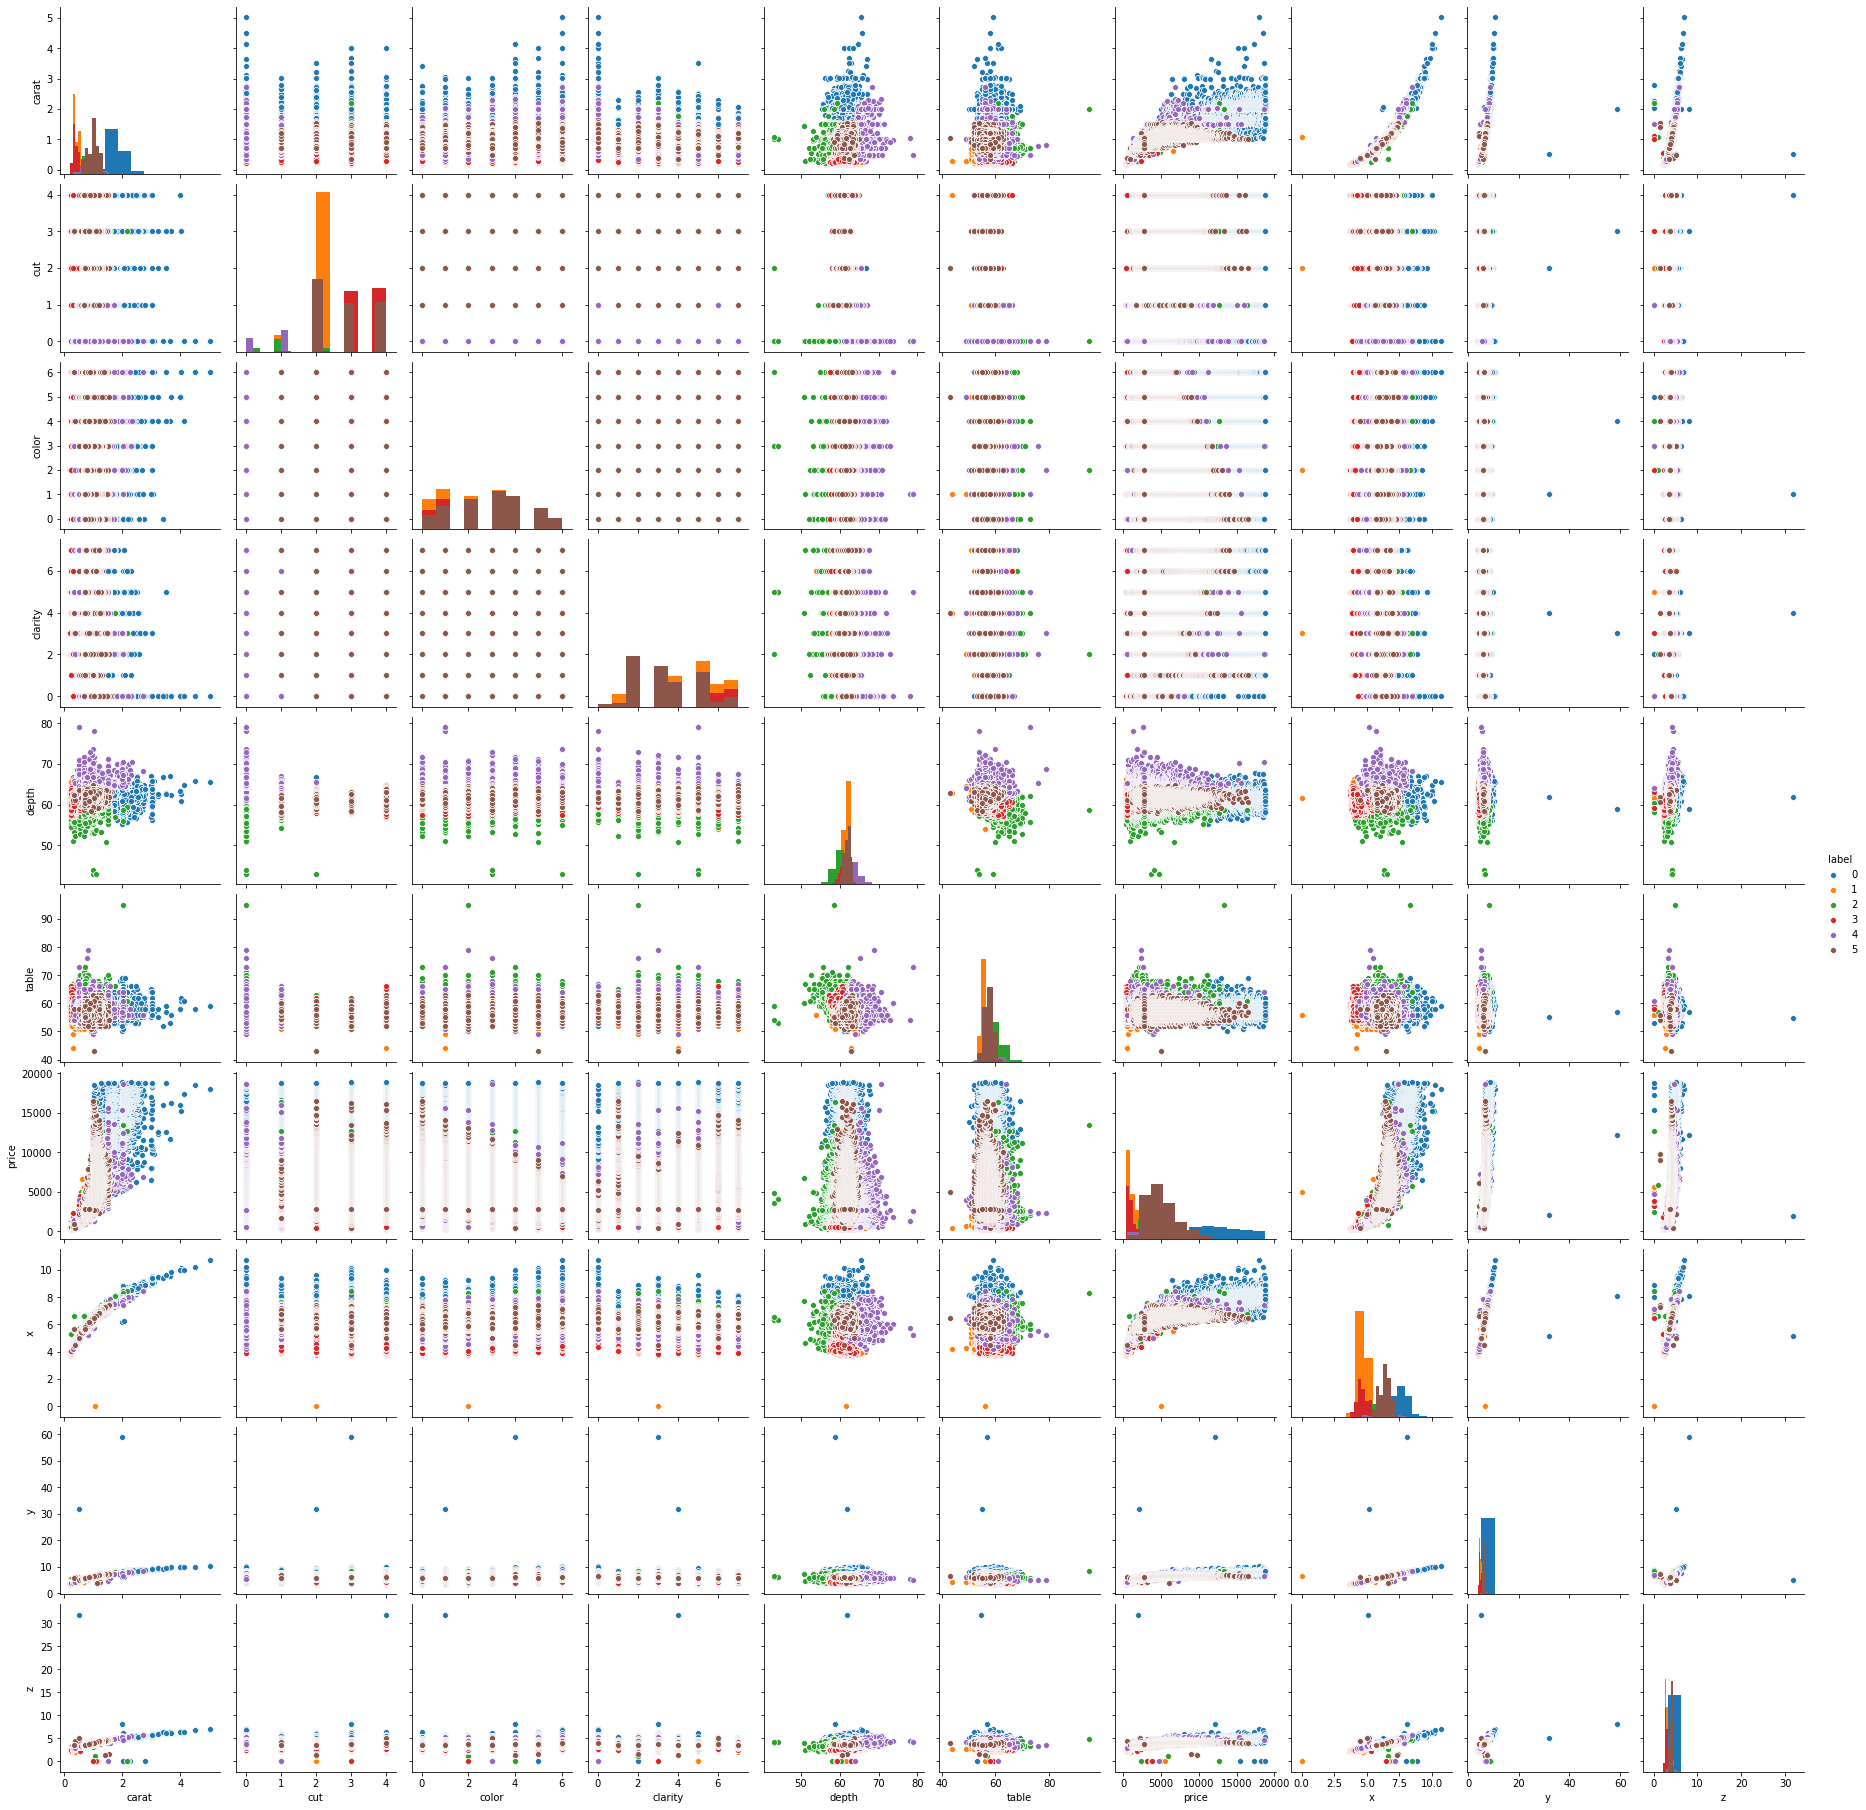

In [33]:
sns.pairplot(datosCopia,hue='label',diag_kind='hist')
plt.plot()

#### Clústering 2: K-means: 10 clústeres

In [34]:
datos_=datos._get_numeric_data().columns
datosCopia=datos[datos_]
datosCopia["label"]=modelos["K-means"][10].labels_

[]

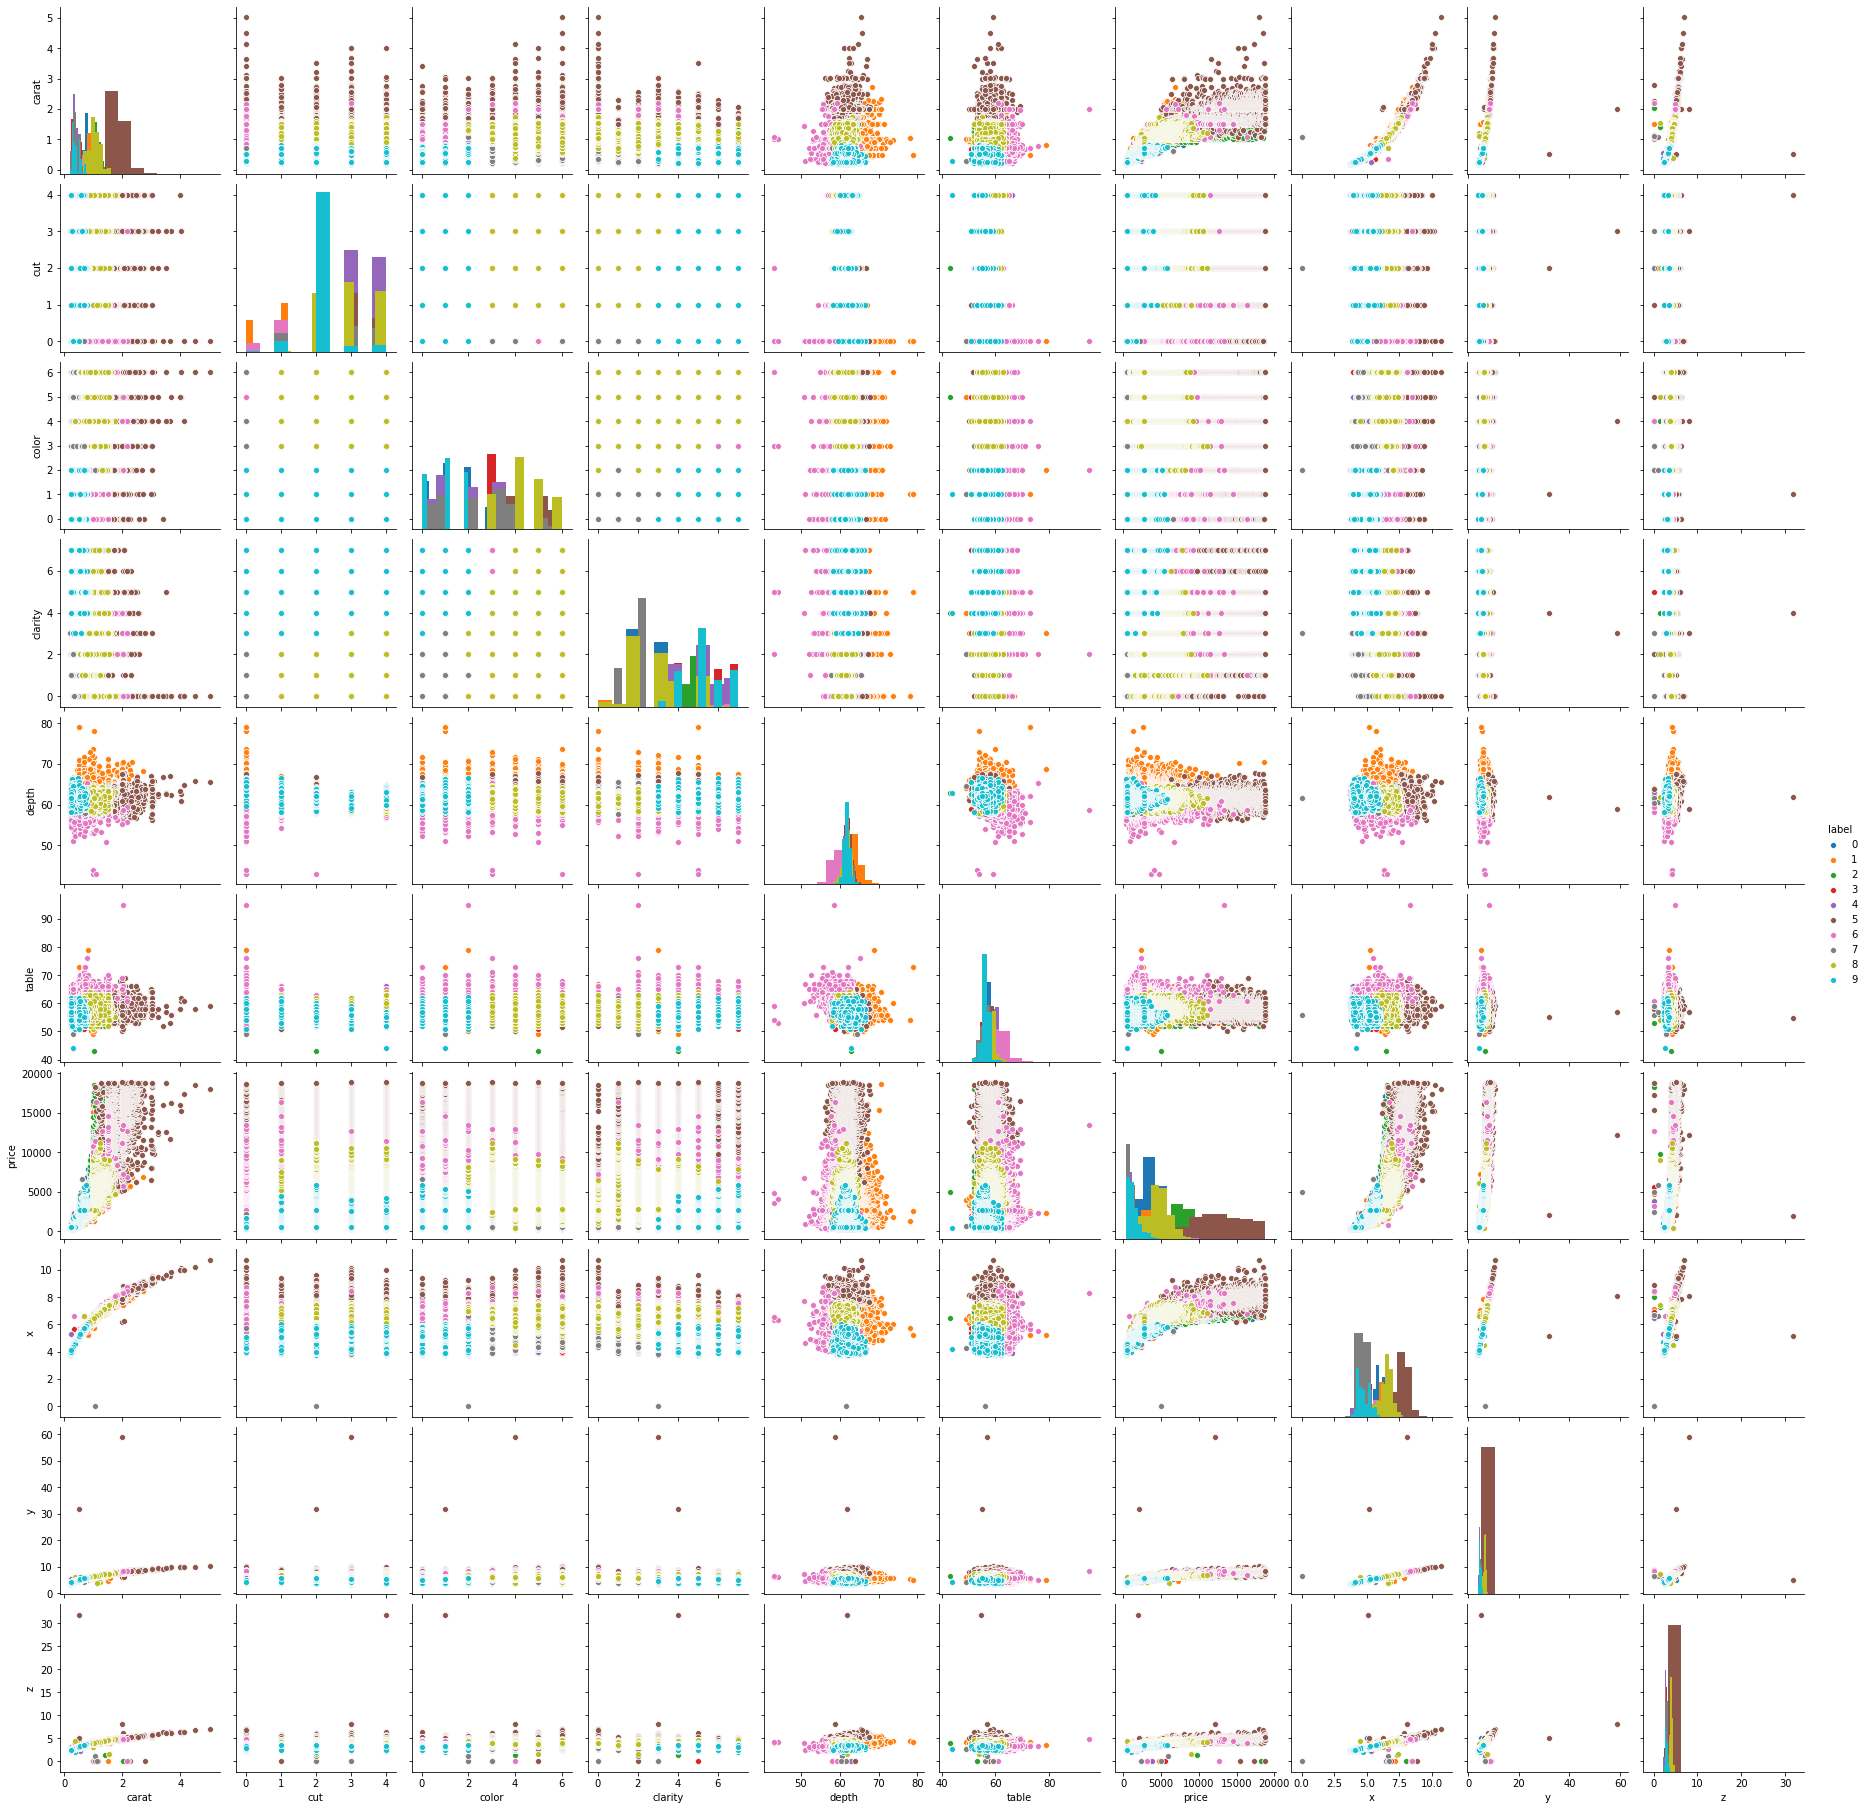

In [35]:
sns.pairplot(datosCopia,hue='label',diag_kind='hist')
plt.plot()

### Mezclas Gaussianas: Full - n=3

In [36]:
datos_=datos._get_numeric_data().columns
datosCopia=datos[datos_]
datosCopia["label"]=models[12][3].predict(datos_scaled)

[]

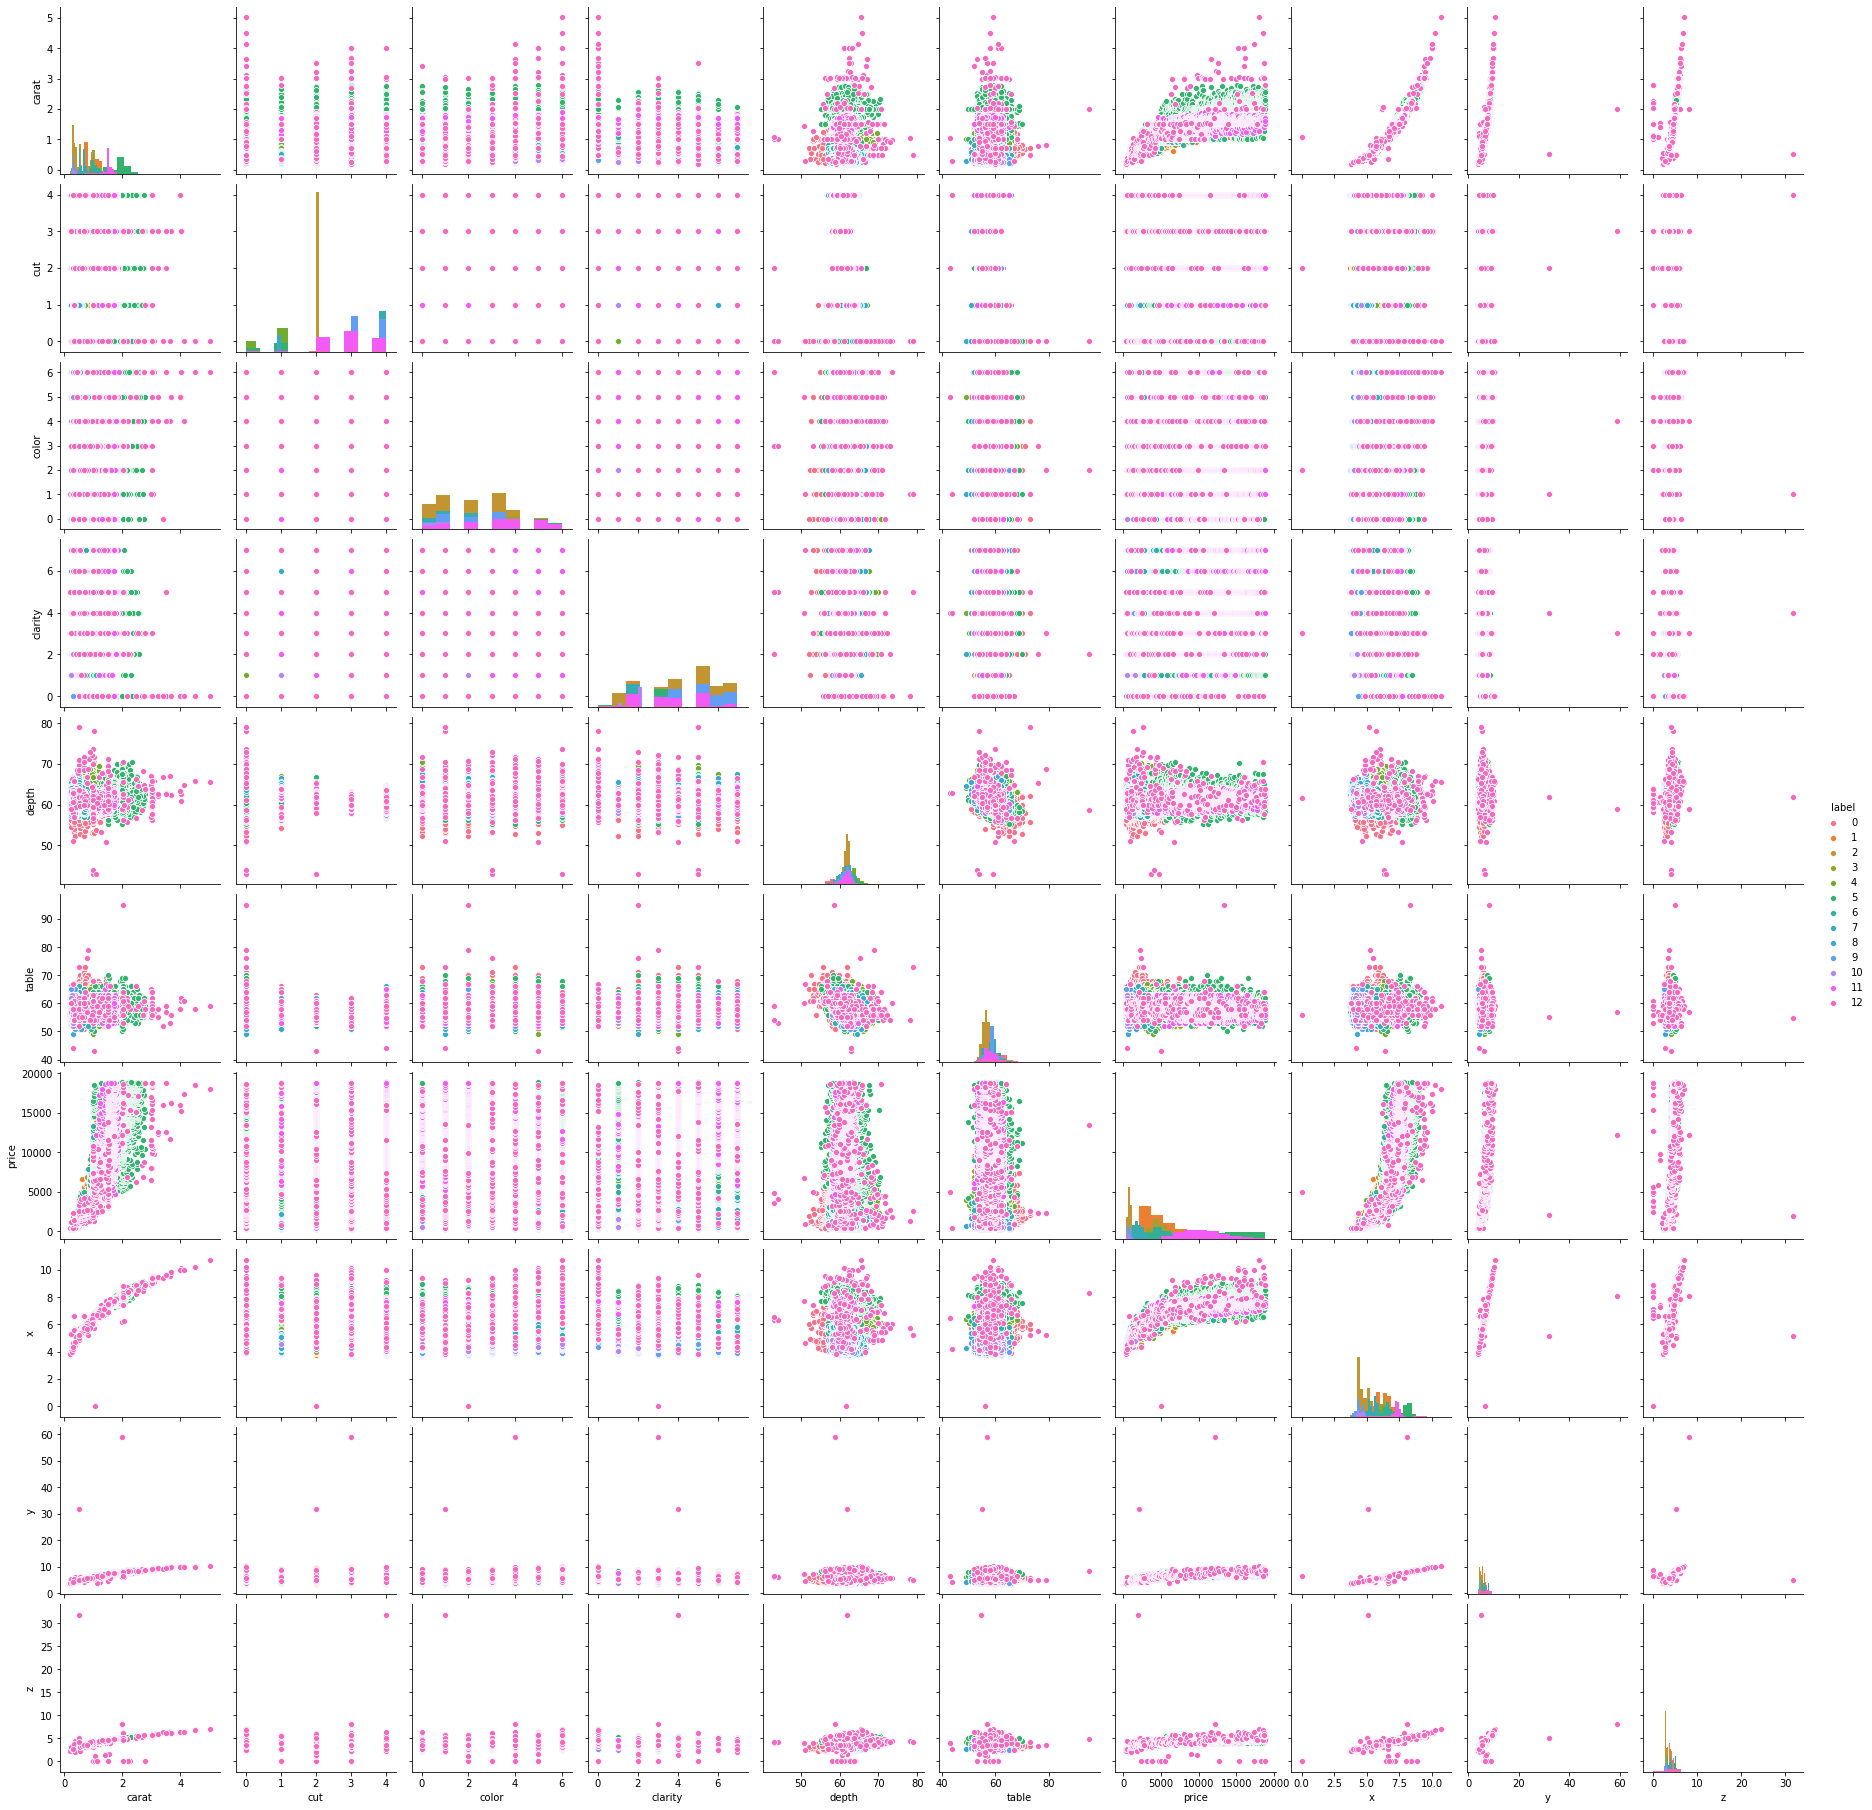

In [37]:
sns.pairplot(datosCopia,hue='label',diag_kind='hist')
plt.plot()

### Conclusión:

Debido a que varias de las diferentes métricas no se encuentran en acuerdo entre sí, la forma para seleccionar qué numero $k$ es óptimo depende de la interpretación que se realice de los datos. Particularmente, es notable cómo los clústers tienden a representar los diferentes valores posibles de carat. Por otro lado, al escoger 2 clústeres, el histograma de z muestra dos grupos con medias bien separadas. Al escoger 6, 10 clústeres o mezclas gaussianas, es claro que los histogramas están bien separados en carat y es curioso que también Z, resulta ser una variable en la cual las distribuciones están bien separadas. 

## Parte 3 - Reducción de dimensionalidad y regresión

Usted quiere predecir el precio del diamante a partir de sus características (toda columna en el dataset que no sea el precio). Sin embargo, tiene la intuición que varias columnas son redundantes - es decir - hay columnas que no aportan información nueva. 

1. Realice una reducción de dimensionalidad de los datos para evitar tener información redundante. Procure que en este nuevo espacio se explique por lo menos el 90% de la varianza de los datos.
2. En una celda de markdown, describa una métrica que se pueda utilizar para evaluar la calidad de su regresión y su habilidad para explicar los datos. 
3. Parta los datos en un conjunto de entrenamiento y otro de evaluación. 
3. Sobre este nuevo espacio, entrene un algoritmo de regresión para predecir el precio de los diamantes sobre el conjunto de entrenamiento. Evalue su algoritmo con su métrica sobre el conjunto de test. ¿Qué tan bien le va a su algoritmo? ¿Lo llevaría a producción? ¿Por qué? 


In [38]:
datos=pd.read_csv('Data/diamonds.csv').drop(['Unnamed: 0'],axis=1)

In [39]:
X=datos_scaled[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']]
y=datos_scaled['price']

In [40]:
from sklearn.decomposition import KernelPCA, PCA

transformers = [PCA(n_components=i).fit(X) for i in range(10)]

var_ratio=np.array([[sum(transformer.explained_variance_ratio_),i] for transformer,i in zip(transformers,range(10))]).T

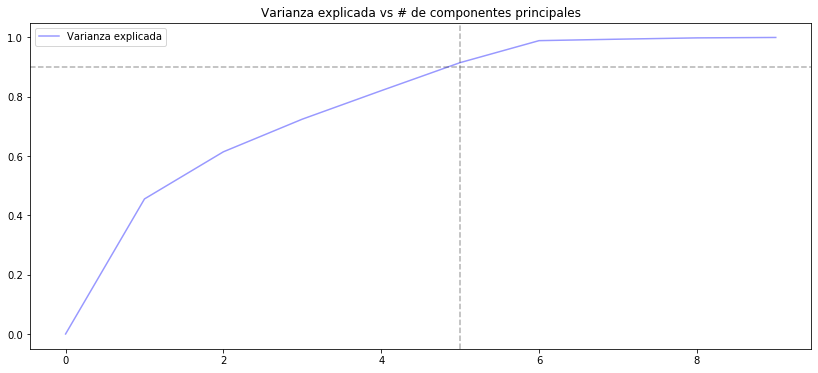

In [41]:
f,ax=plt.subplots(1,1,figsize=(14,6))
plt.plot(var_ratio[1],var_ratio[0],color='b',label='Varianza explicada',alpha=0.4)
ax.axhline(0.9,ls='dashed',color='k',alpha=0.3)
ax.axvline(5,ls='dashed',color='k',alpha=0.3)
plt.legend()
plt.title('Varianza explicada vs # de componentes principales')
plt.show()

In [42]:
print("Con 5 componentes principales es posible explicar el %.2f de la varianza"%sum(transformers[5].explained_variance_ratio_))

Con 5 componentes principales es posible explicar el 0.92 de la varianza


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import StratifiedKFold, KFold

In [44]:
regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=1)

In [45]:
X_transformed=transformers[5].transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=29)

In [47]:
regr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

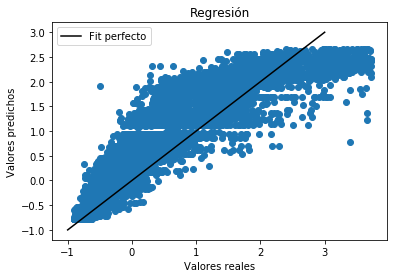

In [48]:
plt.title('Regresión')
plt.scatter(y_test,regr.predict(X_test))
plt.plot([-1,3],[-1,3],color='k',label='Fit perfecto')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.show()

In [49]:
print(regr.score(X_test,y_test))

0.8319449488493047


Comparandolo con la regresión obtenida SIN realizar reducción de dimensionalidad:

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)
regr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

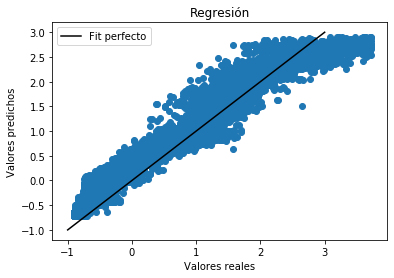

In [51]:
plt.title('Regresión')
plt.scatter(y_test,regr.predict(X_test))
plt.plot([-1,3],[-1,3],color='k',label='Fit perfecto')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.show()

In [52]:
print(regr.score(X_test,y_test))

0.8778354980375495


Por esa razón decidí NO utilizar la transformacion para la siguiente parte (se puede utilizar unicamente reemplazando X por X_transformed)

In [53]:
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
try:
    modelReg=pickle.load( open( "modelReg.pickle", "rb" ) )
except:
    modelReg = GridSearchCV(AdaBoostRegressor(random_state=1),
                       param_grid={"base_estimator": [DecisionTreeRegressor(max_depth=3),\
                                                      DecisionTreeRegressor(max_depth=4),\
                                                      DecisionTreeRegressor(max_depth=5)],
                                   "n_estimators": [10,20,50,100,150,200,300]},scoring={"MSE":'neg_mean_squared_error',"R2":'r2'},refit=False)
    modelReg.fit(X_train,y_train)
    
    with open('modelReg.pickle', 'wb') as f:
        pickle.dump(modelReg, f)
    

In [57]:
n_stim=[10,20,50,100,150,200,300]

Msemean=pd.DataFrame(modelReg.cv_results_['mean_test_MSE'].reshape(3,7),columns=n_stim,index=[3,4,5])
Msestd=pd.DataFrame(modelReg.cv_results_['std_test_MSE'].reshape(3,7),columns=n_stim,index=[3,4,5])
R2mean=pd.DataFrame(modelReg.cv_results_['mean_test_R2'].reshape(3,7),columns=n_stim,index=[3,4,5])
R2std=pd.DataFrame(modelReg.cv_results_['std_test_R2'].reshape(3,7),columns=n_stim,index=[3,4,5])

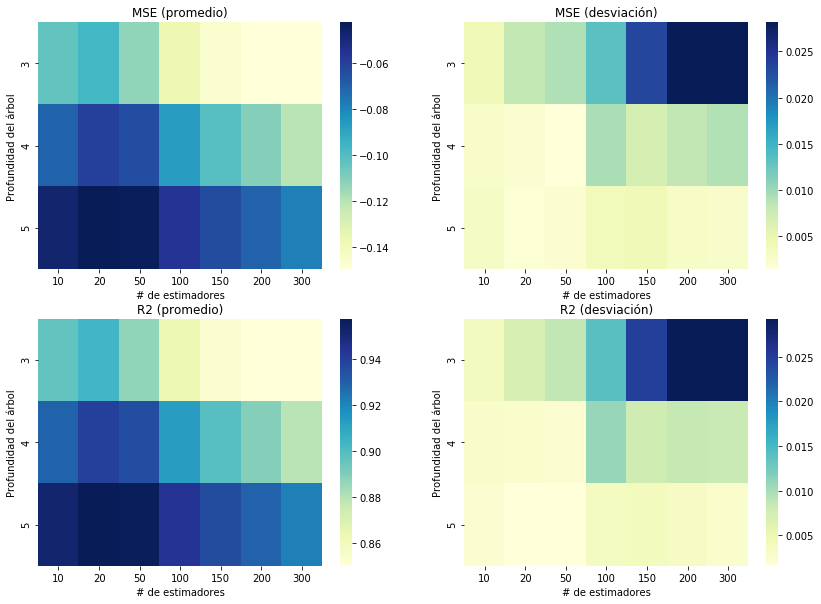

In [58]:
f,ax=plt.subplots(2,2,figsize=(14,10))
sns.heatmap(Msemean,ax=ax[0][0],cmap="YlGnBu")
ax[0][0].set_title('MSE (promedio)')
ax[0][0].set_ylabel('Profundidad del árbol')
ax[0][0].set_xlabel('# de estimadores')

sns.heatmap(Msestd,ax=ax[0][1],cmap="YlGnBu")
ax[0][1].set_title('MSE (desviación)')
ax[0][1].set_ylabel('Profundidad del árbol')
ax[0][1].set_xlabel('# de estimadores')


sns.heatmap(R2mean,ax=ax[1][0],cmap="YlGnBu")
ax[1][0].set_title('R2 (promedio)')
ax[1][0].set_ylabel('Profundidad del árbol')
ax[1][0].set_xlabel('# de estimadores')

sns.heatmap(R2std,ax=ax[1][1],cmap="YlGnBu")
ax[1][1].set_title('R2 (desviación)')
ax[1][1].set_ylabel('Profundidad del árbol')
ax[1][1].set_xlabel('# de estimadores')
plt.show()

Según ambos criterios (MSE) y R2, el mejor modelo entre los modelos evaluados es el modelo DecisionTreeRegressor con 20 estimadores y una profundidad 5 (se podría evaluar si una mayor profundidad permite un mejor ajuste), dado que presenta el MSE más bajo y el R2 más cercano a 1 (0.957), el cual es muy bueno.

In [59]:
modelDef=AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),random_state=1,n_estimators=20)

In [60]:
modelDef.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

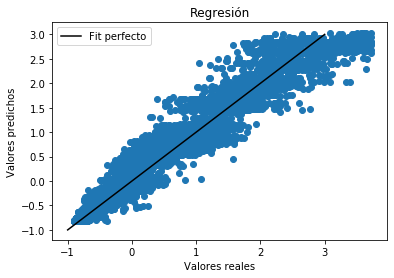

In [61]:
plt.title('Regresión')
plt.scatter(y_test,modelDef.predict(X_test))
plt.plot([-1,3],[-1,3],color='k',label='Fit perfecto')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.show()

In [62]:
print(modelDef.score(X_test,y_test))

0.954804494847792


In [63]:
modelDef.predict(X_test)

array([ 0.08679269, -0.80176648, -0.48060566, ...,  0.03027847,
        0.47219206, -0.80176648])

Claramente se obtuvo un modelo mucho mejor que el obtenido previamente. Realizando una búsqueda más exhaustiva, ser podría lograr un modelo más preciso. 

In [64]:
DatosPredichos=X_test.copy()
DatosPredichos["price"]=modelDef.predict(X_test)
DatosPredichos=DatosPredichos[datos_scaled.columns]
DatosPredichos=pd.DataFrame(scaler.inverse_transform(DatosPredichos),columns=DatosPredichos.columns)
DatosPredichos.sort_index(axis=0)

carat  cut  color  clarity  depth  table         price     x     y  \
0       0.94  3.0    1.0      3.0   60.4   59.0   4278.341828  6.37  6.34   
1       0.32  2.0    4.0      5.0   63.0   57.0    734.178494  4.38  4.35   
2       0.50  3.0    2.0      7.0   60.9   58.0   2015.180851  5.13  5.09   
3       0.42  2.0    3.0      6.0   60.0   57.0    991.811647  4.84  4.86   
4       1.51  3.0    3.0      4.0   62.4   59.0  12315.621184  7.28  7.25   
...      ...  ...    ...      ...    ...    ...           ...   ...   ...   
16175   0.24  4.0    1.0      6.0   62.8   59.0    695.152868  3.94  3.96   
16176   0.32  3.0    1.0      5.0   61.7   58.0    734.178494  4.38  4.41   
16177   0.90  1.0    3.0      5.0   63.2   58.0   4052.925664  6.09  6.16   
16178   1.10  3.0    3.0      3.0   63.0   59.0   5815.570159  6.50  6.47   
16179   0.32  2.0    2.0      5.0   61.9   55.0    734.178494  4.41  4.45   

          z  
0      3.84  
1      2.75  
2      3.11  
3      2.91  
4      4.53  
...     ...  
16175  2.48  
16176  2.71  
16177  3.87  
16178  0.00  
16179  2.74  

[16180 rows x 10 columns]

In [65]:
DatosReales=X_test.copy()
DatosReales["price"]=y_test
DatosReales=DatosReales[datos_scaled.columns]
DatosReales=pd.DataFrame(scaler.inverse_transform(DatosReales),columns=DatosReales.columns)
DatosReales.sort_index(axis=0)

carat  cut  color  clarity  depth  table    price     x     y     z
0       0.94  3.0    1.0      3.0   60.4   59.0   3758.0  6.37  6.34  3.84
1       0.32  2.0    4.0      5.0   63.0   57.0    648.0  4.38  4.35  2.75
2       0.50  3.0    2.0      7.0   60.9   58.0   2016.0  5.13  5.09  3.11
3       0.42  2.0    3.0      6.0   60.0   57.0   1179.0  4.84  4.86  2.91
4       1.51  3.0    3.0      4.0   62.4   59.0  13638.0  7.28  7.25  4.53
...      ...  ...    ...      ...    ...    ...      ...   ...   ...   ...
16175   0.24  4.0    1.0      6.0   62.8   59.0    485.0  3.94  3.96  2.48
16176   0.32  3.0    1.0      5.0   61.7   58.0    702.0  4.38  4.41  2.71
16177   0.90  1.0    3.0      5.0   63.2   58.0   3976.0  6.09  6.16  3.87
16178   1.10  3.0    3.0      3.0   63.0   59.0   3696.0  6.50  6.47  0.00
16179   0.32  2.0    2.0      5.0   61.9   55.0    602.0  4.41  4.45  2.74

[16180 rows x 10 columns]

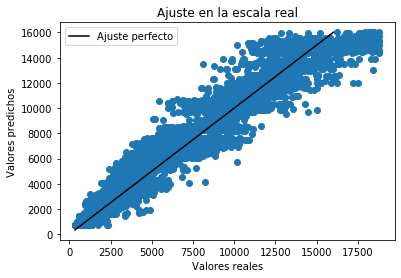

In [66]:
plt.scatter(DatosReales['price'],DatosPredichos['price'])
plt.plot([min(DatosReales['price']),max(DatosPredichos['price'])],[min(DatosReales['price']),max(DatosPredichos['price'])],color='k',label='Ajuste perfecto')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.title('Ajuste en la escala real')
plt.show()

El algoritmo es bueno. Sin embargo, no lo llevaría a producción porque tiene un error típico del orden de 10^3 USD, lo cual implica un riesgo muy alto. Particularmente buscaría de manera exhaustiva un mejor modelo, de tal manera que pueda asegurar por lo menos un ajuste R2 de 0.99. No obstante es un muy buen modelo considerando que se utilizó una cantidad pequeña de datos y que no es muy complejo. 

## Parte 4 - clasificación

En la carpeta ```Data``` hay un archivo llamado ```emotions.csv``` que contiene informacion sobre las ondas electromagneticas emitidas por los cerebros de 2 pacientes. Hay un total de 2549 columnas con 2132 entradas. Su trabajo es predecir el estado de ánimo de la persona (la columna label): NEUTRAL, POSITIVE o NEGATIVE a partir de las otras columnas. Puede ver una descripción extensa del dataset [aquí](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions). 

Implemente el pipeline que considere necesario para llevar a cabo esta tarea. Es libre de escoger las herramientas y los métodos de clasificación que desee siempre y cuando cumpla lo siguiente:

1. Implemente por lo menos 2 algoritmos de clasificación. 
2. Grafique la matriz de confusión y las curvas de precisión y cobertura para cada algoritmo. 

Compare los resultados de sus clasificadores. 

3. ¿Cuál algoritmo es mejor? 
4. ¿Considera que el mejor algoritmo es suficiente para entrar a producción? ¿Por qué? ¿Por qué no? 


## Solución - Parte 4

Antes de comenzar esta sección realizaré una limpieza de las variables. Implementaré dos modelos sencillos de clasificaión Suppor Vector Machines con kernel RBF y Perceptrón multicapa. Teniendo en cuenta los datos, es muy importante realizar normalización, de lo contrario es posible que el código no logre converger. Realizaré una búsqueda de parámetros exhaustiva en ambos casos variando el parámetro C en los SVMs y el número de neuronas en cada capa escondida en el caso del perceptrón multicapa. 

### Clasificador 1

#### Support Vector Machine

In [67]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [68]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [69]:
emotions=pd.read_csv('Data/emotions.csv')

In [70]:
descr=emotions.describe()

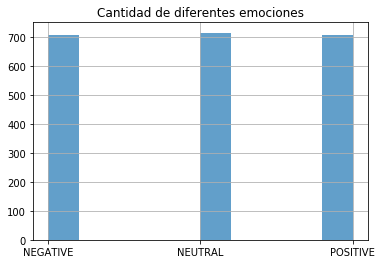

In [71]:
emotions['label'].hist(alpha=0.7)
plt.title('Cantidad de diferentes emociones')
plt.show()

In [72]:
xcols=list(emotions.columns)[:-1]

X=emotions[xcols]
le = preprocessing.LabelEncoder()
y=pd.DataFrame(le.fit_transform(emotions['label']),columns=['label'])



try:
    scaler=pickle.load( open( "scaler.pickle", "rb" ) )
except:
    scaler=scaler.fit(X)
    
    with open('scaler.pickle', 'wb') as f:
        pickle.dump(scaler, f)
        
        
X=scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

### Búsqueda de parámetros:

Inicialmente se realiza una búsqueda de parámetros utilizando la estrategia de búsqueda exhaustiva, definiendo diferentes grillas de parámetros, como se muestra a continuación. No es necesario modificar la forma de calcular el score dado que el conjunto de datos es balanceado. 

In [73]:
try:
    classGrid=pickle.load( open( "classGridFinal.pickle", "rb" ) )
except:
    param_grid = {'degree':[3],'C':np.linspace(1,1000,10)}
    classGrid = GridSearchCV(SVC(kernel='rbf',probability=True), param_grid=param_grid,verbose=True,n_jobs=-1)
    classGrid.fit(X_train,y_train.values.reshape(-1))
    with open('classGridFinal.pickle', 'wb') as f:
        pickle.dump(classGrid, f)

In [74]:
try:
    classGridFine=pickle.load( open( "classGridFinalFine.pickle", "rb" ) )
except:
    param_grid = {'degree':[3],'C':np.linspace(1,12,10)}
    classGridFine = GridSearchCV(SVC(kernel='rbf',probability=True), param_grid=param_grid,verbose=True,n_jobs=-1)
    classGridFine.fit(X_train,y_train)
    with open('classGridFinalFine.pickle', 'wb') as f:
        pickle.dump(classGridFine, f)

Entre los modelos entrenados, el que presenta el mejor parámetro 'C' es el que está cercano a 100, ya que a partir de 100, todos los modelos tienen la misma precisión máxima y como C es el valor más pequeño entre los que tienen el mismo resultado en test, se escoge este porque es el que garantiza un margen de separación más alto en comparación a los demás. 

In [75]:
classGrid.cv_results_

{'mean_fit_time': array([23.73354578, 23.65814638, 26.28831472, 23.56778822, 22.41467156,
        22.13641553, 22.2572916 , 22.1677309 , 23.79059248, 19.18358126]),
 'std_fit_time': array([0.46592178, 2.47522734, 0.58890756, 1.50476754, 0.27403161,
        0.45968588, 0.37546201, 0.27009558, 0.70180861, 5.65414764]),
 'mean_score_time': array([1.44393878, 1.37193213, 1.32565579, 1.33363433, 1.26721187,
        1.27379413, 1.26960549, 1.27678618, 1.33902054, 0.90976863]),
 'std_score_time': array([0.05099602, 0.12767543, 0.05519675, 0.07433848, 0.02825554,
        0.01670563, 0.02957224, 0.0354319 , 0.18489985, 0.18954113]),
 'param_C': masked_array(data=[1.0, 112.0, 223.0, 334.0, 445.0, 556.0, 667.0, 778.0,
                    889.0, 1000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_degree': masked_array(data=[3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
              mas

In [76]:
c_s=[] 
rs_=[]
sts=[]
test=[]
for i,j,k in zip(classGridFine.cv_results_['params'],classGridFine.cv_results_['mean_test_score'],classGridFine.cv_results_['std_test_score']):
    c_s.append(i['C'])
    sts.append(k)
    rs_.append(j)
for i,j,k in zip(classGrid.cv_results_['params'][1:],classGrid.cv_results_['mean_test_score'][1:],classGrid.cv_results_['std_test_score'][1:]):
    c_s.append(i['C'])
    sts.append(k)
    rs_.append(j)

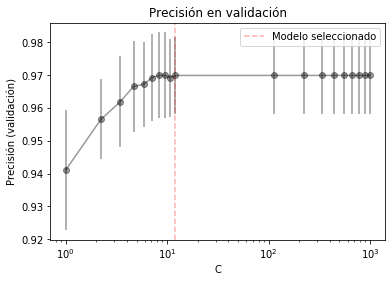

In [77]:
plt.errorbar(c_s,rs_,yerr=sts,fmt='-o',color='k',alpha=0.4)
plt.axvline(12,ls='--',color='r',alpha=0.3,label='Modelo seleccionado')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.ylabel('Precisión (validación)')
plt.title('Precisión en validación')
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix

In [79]:
def get_ROC(y_test,y_score):
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve( y_test_[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    emotions=['NEGATIVE','NEUTRAL','POSITIVE']

    f,ax=plt.subplots(1,3,figsize=(15,5))
    for i in range(len(emotions)):

        lw = 2

        ax[i].plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        ax[i].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        ax[i].set_xlim([0.0, 1.0])
        ax[i].set_ylim([0.0, 1.05])
        ax[i].set_xlabel('False Positive Rate')
        ax[i].set_ylabel('True Positive Rate')
        ax[i].set_title('ROC ({})'.format(emotions[i]))
        ax[i].legend(loc="lower right")
    plt.show()

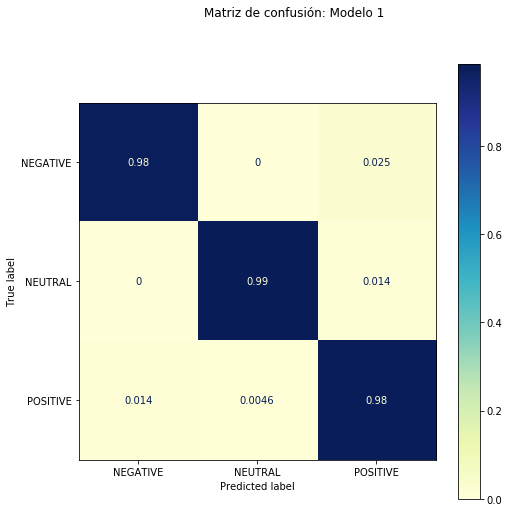

In [80]:
f,ax=plt.subplots(1,1,figsize=(8,8))
plot_confusion_matrix(classGrid.best_estimator_, X_test, y_test,cmap='YlGnBu',ax=ax,normalize='true',display_labels=['NEGATIVE','NEUTRAL','POSITIVE'])
plt.suptitle('Matriz de confusión: Modelo 1')
plt.show()

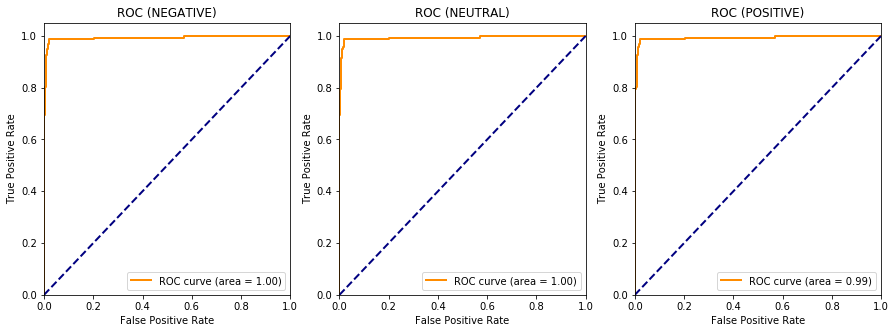

In [81]:
y_test_ = label_binarize(y_test, classes=[0, 1, 2])
y_score = classGrid.best_estimator_.decision_function(X_test)
get_ROC(y_test_,y_score)

### Clasificador 2
#### Perceptrón multicapa

In [83]:
try:
    model2=pickle.load( open( "model2.pickle", "rb" ) )
except:
    model2=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                  beta_2=0.999, early_stopping=False, epsilon=1e-08,
                  hidden_layer_sizes=(1000, 1000), learning_rate='constant',
                  learning_rate_init=0.1, max_fun=15000, max_iter=300, momentum=0.9,
                  n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                  random_state=1, shuffle=True, solver='adam', tol=0.0001,
                  validation_fraction=0.1, verbose=True, warm_start=False)

    model2.fit(X_train,y_train)

    with open('model2.pickle', 'wb') as f:
        pickle.dump(model2, f)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = 0.24406257
Iteration 18, loss = inf
Iteration 19, loss = 0.18685185
Iteration 20, loss = 0.24294268
Iteration 21, loss = 0.18638608
Iteration 22, loss = 0.18960385
Iteration 23, loss = 0.34914434
Iteration 24, loss = 0.18569165
Iteration 25, loss = 0.18546706
Iteration 26, loss = 0.18524334
Iteration 27, loss = 0.24531550
Iteration 28, loss = 0.18479905
Iteration 29, loss = 0.18458133
Iteration 30, loss = 0.18436646
Iteration 31, loss = 0.18415426
Iteration 32, loss = 0.18394473
Iteration 33, loss = 0.18373785
Iteration 34, loss = 0.18353359
Iteration 35, loss = 0.18333191
Iteratio

In [84]:
model2.predict_proba(X_test)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

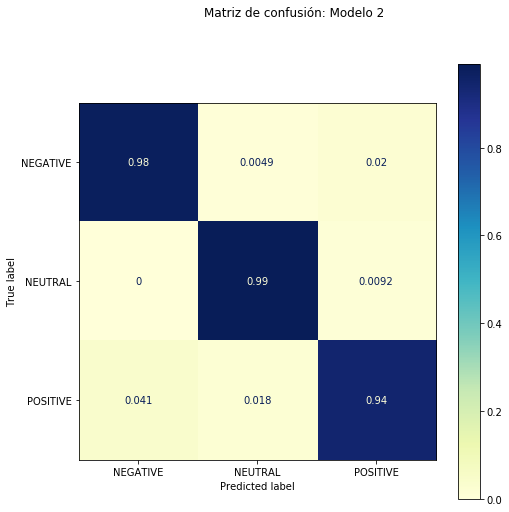

In [85]:
f,ax=plt.subplots(1,1,figsize=(8,8))
plot_confusion_matrix(model2, X_test, y_test,cmap='YlGnBu',ax=ax,normalize='true',display_labels=['NEGATIVE','NEUTRAL','POSITIVE'])
plt.suptitle('Matriz de confusión: Modelo 2')
plt.show()

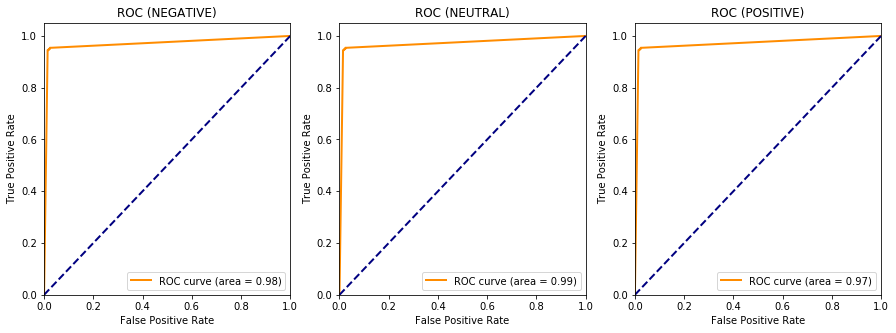

In [86]:
y_test_ = label_binarize(y_test, classes=[0, 1, 2])
y_score = model2.predict_proba(X_test)
get_ROC(y_test_,y_score)

### Conclusión:

- Escogería el modelo de **Support Vector Machines**, debido a que tiene una mayor precisión y una mejor área bajo la curva que el modelo de perceptrón multicapa. 

- Sí utilizaría el modelo para producción. Tiene una respuesta ROC excelente y tiene un error de clasificación lo suficientemente bajo. Adicionalmente, es un modelo ligero!

In [87]:
try:
    modeloEscogido=pickle.load( open( "modeloEscogido.pickle", "rb" ) )
except:
    
    modeloEscogido=classGrid.best_estimator_

    with open('modeloEscogido.pickle', 'wb') as f:
        pickle.dump(modeloEscogido, f)

In [88]:
modeloEscogido

SVC(C=112.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Parte 5 - Despliegue

Despliegue el mejor clasificador de la etapa anterior en un endpoint. El endpoint debe procesar el objeto JSON del *body* de un POST request. El formato del objeto JSON es el siguiente:

```
{"input":[val1,val2,val3, ... ,val2548]}

```
El orden de los valores corresponde al orden de las columnas del archivo `emotions.csv`. La lista tiene 2548 valores que corresponden a los 2548 que su clasificador debe tomar como input. 

El endpoint debe retornar un json de la siguiente forma si la petición fue exitosa: 

```
{"output":"clasfOutput"}
```

Donde "clasfOutput" corresponde a la predicción del clasificador (NEUTRAL, POSITIVE o NEGATIVE).

In [89]:
#Puede reiniciar el notebook el kernel si lo desea

In [90]:
import requests
import pandas as pd

In [91]:
#Parte 1: 
#Crear de manera sintética un string que tenga la forma:
#{"input":[val1,val2,val3, ... ,val2548]}

In [92]:
emotions=pd.read_csv('Data/emotions.csv')
xcols=list(emotions.columns)[:-1]
X=emotions[xcols].values

In [93]:
#Escoger un X aleatorio SIN normalizar:
X[14]
str_='{'+'"input":{} '.format(list(X[15]))+'}'

In [94]:
#Parte 2:
#Ejecute en la consola en la ubicación en la que se encuentra
#este notebook el archivo deploy.py

In [96]:
url = 'http://127.0.0.1:5000/'
params ={'query': str_}
response = requests.get(url, params)
response.json()

{'output': 'NEGATIVE'}

# FIN